In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import seaborn as sns

In [2]:
!pip install resampy
import resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.7 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install ffmpeg
os.chdir("drive/My Drive/accent_trans") # this changes directory, not needed
import warnings
warnings.filterwarnings('ignore')

OUTPUT_DIR = './working/'

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=6c42236520bab7123711b26035a2cca1a778f599011d1929b4a7701bcff543cd
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [5]:
!unzip data.zip

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [6]:
for dirname, _, filenames in os.walk('./data/recordings/'):
    for filename in filenames:
        pass # comment this and uncomment the next line to see all files
        # print(os.path.join(dirname, filename))



In [7]:
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
from tqdm import *
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)



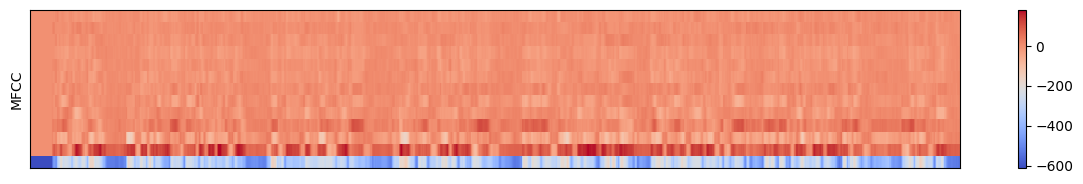

In [8]:
# MFCC for female
SAMPLE_RATE = 22050
fname_f = './data/recordings/twi1.mp3'

y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 20)# Chop audio at 10 secs...
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 13)# 10 MFCC components

plt.figure(figsize=(15, 7))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

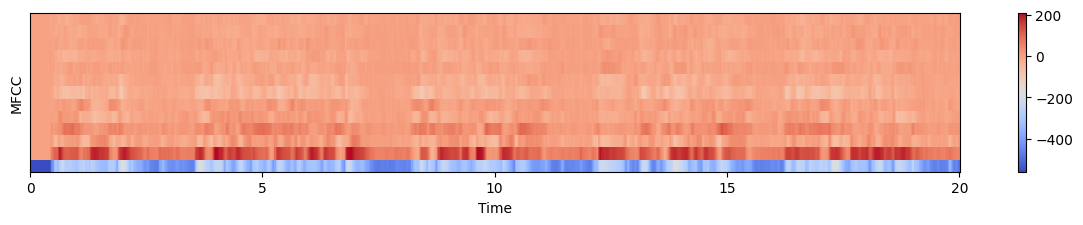

In [9]:
# MFCC for male
SAMPLE_RATE = 22050
y, sr = librosa.load('./data/recordings/english381.mp3', sr=SAMPLE_RATE, duration = 20)
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 13)

plt.figure(figsize=(15, 7))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [10]:
data = pd.read_csv('./data/speakers_all.csv')

In [11]:
data.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [12]:
data.tail()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,False,NaN,NaN,NaN
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,False,NaN,NaN,NaN
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,False,NaN,NaN,NaN
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,False,NaN,NaN,NaN
2171,24.0,14.0,"bulawayo, zimbabwe",zulu1,zulu,female,406,zimbabwe,False,NaN,NaN,NaN


In [13]:
data[data['native_language']=='english']

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
363,42.0,0.0,"pittsburgh, pennsylvania, usa",english1,english,male,61,usa,False,NaN,NaN,NaN
364,35.0,0.0,"davenport, iowa, usa",english10,english,female,62,usa,False,NaN,NaN,NaN
365,23.0,0.0,"miami, florida, usa",english100,english,female,63,usa,False,NaN,NaN,NaN
366,18.0,0.0,"toronto, ontario, canada",english101,english,female,64,canada,False,NaN,NaN,NaN
367,22.0,0.0,"torrington, connecticut, usa",english102,english,male,65,usa,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
937,18.0,0.0,"mishawaka, indiana, usa",english95,english,male,160,usa,False,NaN,NaN,NaN
938,31.0,0.0,"point pleasant, new jersey, usa",english96,english,male,161,usa,False,NaN,NaN,NaN
939,42.0,0.0,"wilmington nc, north carolina, usa",english97,english,male,162,usa,False,NaN,NaN,NaN
940,22.0,0.0,"spokane, washington, usa",english98,english,male,163,usa,False,NaN,NaN,NaN


In [14]:
data[data['file_missing?']=='True'].count()

age                0
age_onset          0
birthplace         0
filename           0
native_language    0
sex                0
speakerid          0
country            0
file_missing?      0
Unnamed: 9         0
Unnamed: 10        0
Unnamed: 11        0
dtype: int64

Let's found gender class distribution:

In [15]:
data['sex'].value_counts()

male      1123
female    1048
famale       1
Name: sex, dtype: int64

In [16]:
res=data['native_language'].value_counts()

In [17]:
res1 =data[data['native_language']!='english'].native_language.value_counts()

In [18]:
res1[res>40].sum()

587

In [19]:
dg=data.groupby("native_language").filter(lambda x: len(x) > 40)

In [20]:
# Unseen data for testing later
test_data = data.groupby("native_language").filter(lambda x: len(x) <40)

In [21]:
dg.sex.value_counts()

male      612
female    554
Name: sex, dtype: int64

In [22]:
dg['native_language'].value_counts()

english       579
spanish       162
arabic        102
mandarin       65
french         63
korean         52
portuguese     48
russian        48
dutch          47
Name: native_language, dtype: int64

In [23]:
dg.isnull().sum()

age                   0
age_onset             0
birthplace            0
filename              0
native_language       0
sex                   0
speakerid             0
country               0
file_missing?         0
Unnamed: 9         1166
Unnamed: 10        1166
Unnamed: 11        1166
dtype: int64

In [24]:
dg.describe()

,age,age_onset,speakerid,Unnamed: 9,Unnamed: 10
count,1166.000000,1166.000000,1166.000000,0.0,0.0
mean,33.313465,6.478988,1120.920240,NaN,NaN
std,15.044959,8.198044,626.785428,NaN,NaN
min,6.000000,0.000000,11.000000,NaN,NaN
25%,22.000000,0.000000,572.250000,NaN,NaN
50%,28.000000,2.000000,1206.500000,NaN,NaN
75%,41.000000,12.000000,1649.750000,NaN,NaN
max,90.000000,75.000000,2173.000000,NaN,NaN


In [25]:
dg.info

<bound method DataFrame.info of        age  age_onset            birthplace   filename native_language  \
70    38.0       12.0  riyadh, saudi arabia    arabic1          arabic   
71    26.0        5.0          cairo, egypt   arabic10          arabic   
72    40.0       10.0       beirut, lebanon  arabic100          arabic   
73    21.0       10.0           doha, qatar  arabic101          arabic   
74    22.0        3.0  jiddah, saudi arabia  arabic102          arabic   
...    ...        ...                   ...        ...             ...   
1942  31.0       21.0        juarez, mexico  spanish95         spanish   
1943  29.0       12.0        arequipa, peru  spanish96         spanish   
1944  52.0       19.0      bogota, colombia  spanish97         spanish   
1945  34.0       29.0      veracruz, mexico  spanish98         spanish   
1946  20.0        4.0            lima, peru  spanish99         spanish   

         sex  speakerid       country  file_missing?  Unnamed: 9  Unnamed: 10  

In [26]:
data.shape

(2172, 12)

In [27]:
dg.shape

(1166, 12)

In [28]:
dg['filename'] = dg['filename'].apply(lambda x: x+'.mp3')

In [29]:
dg.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
70,38.0,12.0,"riyadh, saudi arabia",arabic1.mp3,arabic,female,11,saudi arabia,False,NaN,NaN,NaN
71,26.0,5.0,"cairo, egypt",arabic10.mp3,arabic,male,12,egypt,False,NaN,NaN,NaN
72,40.0,10.0,"beirut, lebanon",arabic100.mp3,arabic,female,2159,lebanon,False,NaN,NaN,NaN
73,21.0,10.0,"doha, qatar",arabic101.mp3,arabic,male,2160,qatar,False,NaN,NaN,NaN
74,22.0,3.0,"jiddah, saudi arabia",arabic102.mp3,arabic,male,2161,saudi arabia,False,NaN,NaN,NaN


In [30]:
dg.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],inplace=True)

In [31]:
dg.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
70,38.0,12.0,"riyadh, saudi arabia",arabic1.mp3,arabic,female,11,saudi arabia,False
71,26.0,5.0,"cairo, egypt",arabic10.mp3,arabic,male,12,egypt,False
72,40.0,10.0,"beirut, lebanon",arabic100.mp3,arabic,female,2159,lebanon,False
73,21.0,10.0,"doha, qatar",arabic101.mp3,arabic,male,2160,qatar,False
74,22.0,3.0,"jiddah, saudi arabia",arabic102.mp3,arabic,male,2161,saudi arabia,False


In [32]:
dg['accent'] = dg['native_language'].apply(lambda x: 'native' if x=='english' else 'non-native')

In [33]:
dg['accent'].value_counts()

non-native    587
native        579
Name: accent, dtype: int64

In [34]:
dg.nunique()

age                  74
age_onset            47
birthplace          733
filename           1166
native_language       9
sex                   2
speakerid          1166
country              95
file_missing?         1
accent                2
dtype: int64

In [35]:
def feature_extractor(files, feature_type='mfcc'):
    features = []
    SAMPLE_RATE = 22050
    dire = 'recordings/'
    if feature_type == 'mfcc':
        for file in files:
            f_name = str(dire + file)

            # Load the 5-second segment
            y5, sr5 = librosa.load(f_name, sr=SAMPLE_RATE, duration=5)
            mfcc5 = librosa.feature.mfcc(y=y5, sr=SAMPLE_RATE, n_mfcc=10)

            # Load the 8-second segment
            y8, sr8 = librosa.load(f_name, sr=SAMPLE_RATE, duration=8)
            mfcc8 = librosa.feature.mfcc(y=y8, sr=SAMPLE_RATE, n_mfcc=10)

            # Combine the features from both segments
            combined_mfcc = np.concatenate((mfcc5, mfcc8), axis=1)
            features.append(combined_mfcc)
    return features


In [36]:
def feature_extractor(files, feature_type='mfcc'):
    features = []
    SAMPLE_RATE = 22050
    dire = 'recordings/'
    if feature_type == 'mfcc':
        for file in files:
            f_name = str(dire+file)
            y, sr = librosa.load(f_name, sr=SAMPLE_RATE, duration = 5)
            y, sr = librosa.load(f_name, sr=SAMPLE_RATE, duration = 5)
            mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 10)
            features.append(mfcc)
    return features

In [ ]:
#def feature_extractor_sample(files, feature_type='mfcc'):
  #  features = []
   # SAMPLE_RATE = 22050
    #dire = 'recordings/'
    #if feature_type == 'mfcc':
      #  for file in files:
          #  f_name = str(dire+file)
           # y, sr = librosa.load(f_name, sr=SAMPLE_RATE, duration=2)
           # mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc=5)
           # features.append(mfcc)
   # return features


#features = feature_extractor_sample(dg['filename'])
#features[0]

In [ ]:
# features = feature_extractor(dg['filename'])

In [ ]:
# features[0]

In [37]:
class Config(object):
    def __init__(self,sampling_rate=16000, audio_duration=2, n_classes=10, learning_rate=0.0001, max_epochs=20, n_mfcc=40):
        self.sampling_rate = sampling_rate
        self.audio_duration = audio_duration
        self.n_classes = n_classes
        self.n_mfcc = n_mfcc
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.audio_length = self.sampling_rate * self.audio_duration
        self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)

def prepare_data(fnames, config, data_dir):
    X = np.empty(shape=(len(fnames), config.dim[0], config.dim[1], 1))
    input_length = config.audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        file_path = os.path.join(data_dir, fname)
        data, _ = librosa.core.load(file_path, sr=config.sampling_rate, res_type="kaiser_fast")

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        data = librosa.feature.mfcc(y=data, sr=config.sampling_rate, n_mfcc=config.n_mfcc)
        data = np.expand_dims(data, axis=-1)
        X[i,] = data
    return X


In [38]:

!pip install resampy
import resampy

In [ ]:
X_fnames = np.array(dg['filename'])
data_path = './data/recordings/'

config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=13, n_classes=2)
feature_file_path = OUTPUT_DIR+'mfcc_features.npy'
# feature_file_path = '/kaggle/input/speechdetection/mfcc_features.npy'
if os.path.exists(feature_file_path):
    X = np.load(feature_file_path)
else:
    X = prepare_data(X_fnames, config, data_path)
    np.save(feature_file_path, X)

In [ ]:
# with open(OUTPUT_DIR+'mfcc_features.npy', 'wb+') as f:
#     np.save(f, X)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y_gender = dg['sex']
y_accent = dg['accent']

encoder = LabelEncoder()
encoder.fit(y_gender)
y_gender = encoder.transform(y_gender)

encoder1 = LabelEncoder()
encoder1.fit(y_accent)
y_accent = encoder1.transform(y_accent)
y_gender = to_categorical(np.array(y_gender))
y_accent = to_categorical(np.array(y_accent))

Normalization

Normalization is a crucial preprocessing step. The simplest method is rescaling the range of features to scale the range in [0, 1].

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_gender_train, y_gender_test, y_accent_train, y_accent_test = train_test_split(X, y_gender, y_accent, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_gender_train.shape)
print ('Test set:', X_test.shape,  y_gender_test.shape)

X_train, X_val, y_gender_train, y_gender_val, y_accent_train, y_accent_val = train_test_split(X_train, y_gender_train, y_accent_train, test_size=0.15, random_state=10)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_val = (X_val - mean)/std
X_test = (X_test - mean)/std

Train set: (932, 13, 862, 1) (932, 2)
Test set: (234, 13, 862, 1) (234, 2)


In [ ]:
print ('Label accent set:', y_accent_train.shape,  y_accent_test.shape)

Label accent set: (792, 2) (234, 2)


In [ ]:
dg.corr()

,age,age_onset,speakerid,file_missing?
age,1.000000,0.077291,-0.005441,NaN
age_onset,0.077291,1.000000,0.130604,NaN
speakerid,-0.005441,0.130604,1.000000,NaN
file_missing?,NaN,NaN,NaN,NaN


In [ ]:
dg.isnull()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,accent
70,False,False,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False,False,False
72,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1942,False,False,False,False,False,False,False,False,False,False
1943,False,False,False,False,False,False,False,False,False,False
1944,False,False,False,False,False,False,False,False,False,False
1945,False,False,False,False,False,False,False,False,False,False


<Axes: >

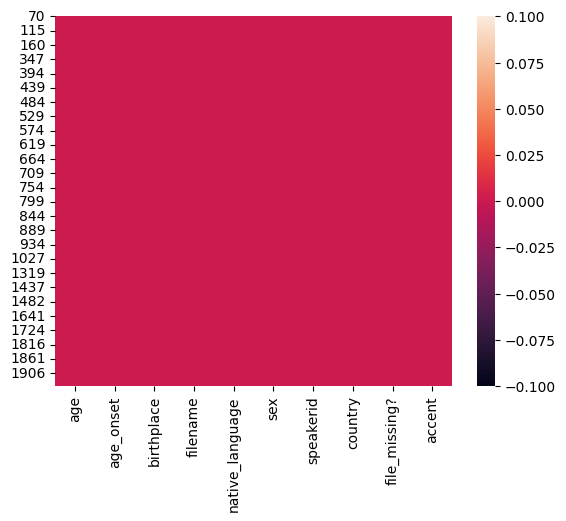

In [ ]:
sns.heatmap(dg.isnull())

<Axes: >

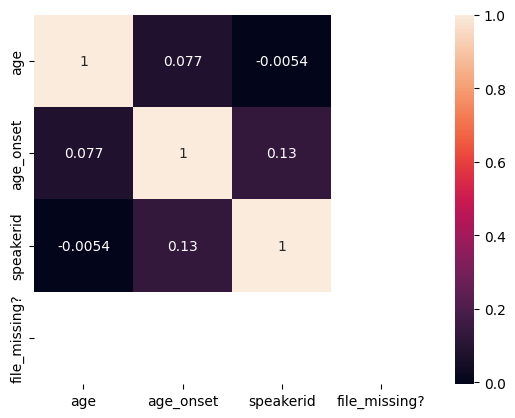

In [ ]:
sns.heatmap(dg.corr(),annot=True)

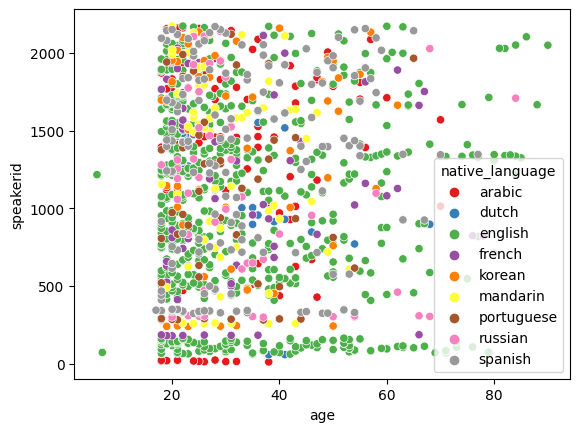

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Crop_Damage' contains numerical values in your DataFrame 'dg'
# Convert it to a categorical type
dg['native_language'] = dg['native_language'].astype('category')

# Now you can use 'Crop_Damage' as the hue variable
sns.scatterplot(data=dg, x='age', y='speakerid', hue='native_language', palette='Set1')
plt.show()

<Axes: xlabel='age', ylabel='count'>

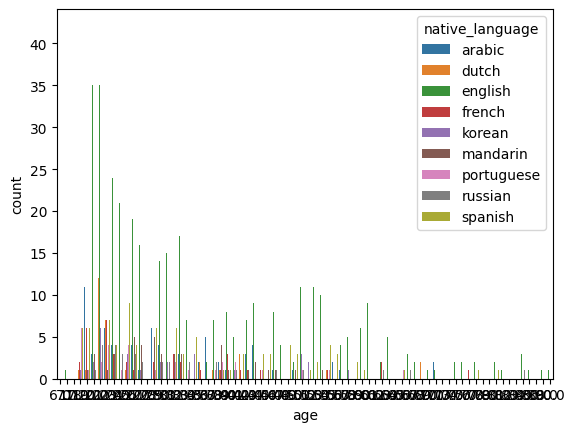

In [ ]:
sns.countplot(x='age',hue='native_language',data=dg)

# Simple Multilayer Feedforward Neural Network

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Input, Conv2D, BatchNormalization, MaxPooling2D, LSTM, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf
from keras.regularizers import l2

In [ ]:
input_layer = Input(shape=(13, 862), name='Input')

dense1=Dense(128, activation='relu',name='Hidden_1')(input_layer)
dropout1 = Dropout(0.5)(dense1)

dense2=Dense(256, activation='relu',name='Hidden_2')(dropout1)
dropout2 = Dropout(0.5)(dense2)

dense3=Dense(128, activation='relu',name='Hidden_3')(dropout2)
dropout3 = Dropout(0.5)(dense3)
m = tf.keras.layers.Flatten()(dropout3)

out_accent = Dense(2, activation='sigmoid',name='output_accent')(m)
out_gender = Dense(2, activation='sigmoid',name='output_gender')(m)


model_ffn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])


In [ ]:
model_ffn.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 13, 862)]            0         []                            
                                                                                                  
 Hidden_1 (Dense)            (None, 13, 128)              110464    ['Input[0][0]']               
                                                                                                  
 dropout_21 (Dropout)        (None, 13, 128)              0         ['Hidden_1[0][0]']            
                                                                                                  
 Hidden_2 (Dense)            (None, 13, 256)              33024     ['dropout_21[0][0]']          
                                                                                           

In [ ]:
model_ffn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 85 # 70 change this to 70 or higher
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/audio_classification_ffn.hdf5', mode='min',
                               verbose=1, save_best_only=True,patience=0, monitor='val_loss')
early_stopping = EarlyStopping(monitor="val_loss", mode="min")

start = datetime.now()

history = model_ffn.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
23/25 [==========================>...] - ETA: 0s - loss: 1.7451 - output_accent_loss: 0.8745 - output_gender_loss: 0.8707 - output_accent_accuracy: 0.5217 - output_gender_accuracy: 0.5245
Epoch 1: val_loss improved from inf to 1.35076, saving model to ./working/saved_models/audio_classification_ffn.hdf5
25/25 [==============================] - 4s 34ms/step - loss: 1.7348 - output_accent_loss: 0.8677 - output_gender_loss: 0.8671 - output_accent_accuracy: 0.5240 - output_gender_accuracy: 0.5202 - val_loss: 1.3508 - val_output_accent_loss: 0.6857 - val_output_gender_loss: 0.6651 - val_output_accent_accuracy: 0.5214 - val_output_gender_accuracy: 0.6071
Epoch 2/85
25/25 [==============================] - ETA: 0s - loss: 1.4496 - output_accent_loss: 0.7544 - output_gender_loss: 0.6952 - output_accent_accuracy: 0.5505 - output_gender_accuracy: 0.6225
Epoch 2: val_loss improved from 1.35076 to 1.32855, saving model to ./working/saved_models/audio_classification_ffn.hdf5
25/25 [=====

### Evaluation

In [ ]:
results = model_ffn.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results)

8/8 [==============================] - 0s 11ms/step - loss: 1.0021 - output_accent_loss: 0.6242 - output_gender_loss: 0.3778 - output_accent_accuracy: 0.6581 - output_gender_accuracy: 0.8803
[1.0020599365234375, 0.6242276430130005, 0.37783223390579224, 0.6581196784973145, 0.8803418874740601]


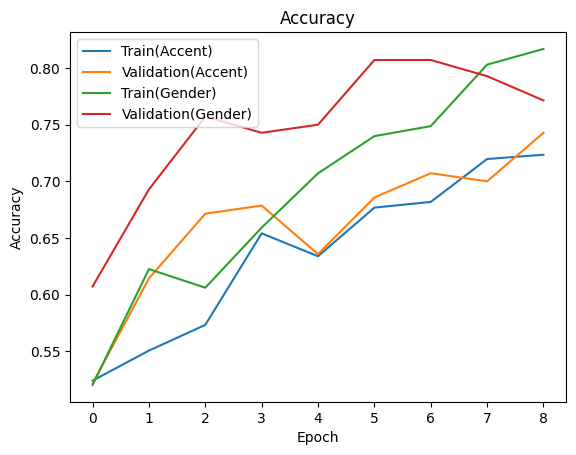

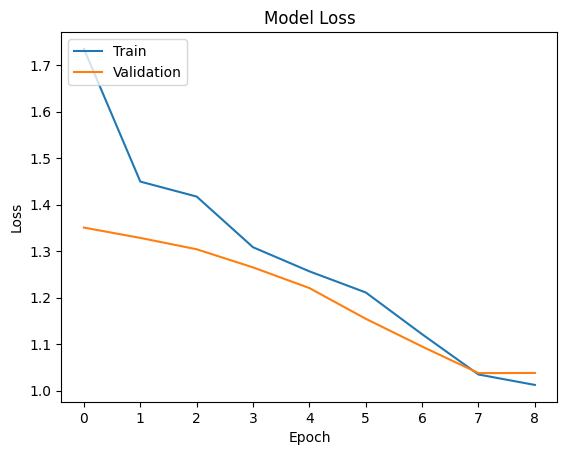

In [ ]:
# Plot training and validation accuracy values
plt.plot(history.history['output_accent_accuracy'])
plt.plot(history.history['val_output_accent_accuracy'])
plt.plot(history.history['output_gender_accuracy'])
plt.plot(history.history['val_output_gender_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train(Accent)','Validation(Accent)', 'Train(Gender)','Validation(Gender)'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

In [ ]:
accent_prediction, gender_prediction = model_ffn.predict(X_test)
prediction_accent_rounded = [np.argmax(i) for i in accent_prediction]
# prediction_ANN_rounded[0]
y_test_index = [np.argmax(i) for i in y_accent_test]

8/8 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_index, prediction_accent_rounded))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       116
           1       0.65      0.69      0.67       118

    accuracy                           0.66       234
   macro avg       0.66      0.66      0.66       234
weighted avg       0.66      0.66      0.66       234



Text(120.72222222222221, 0.5, 'True_value')

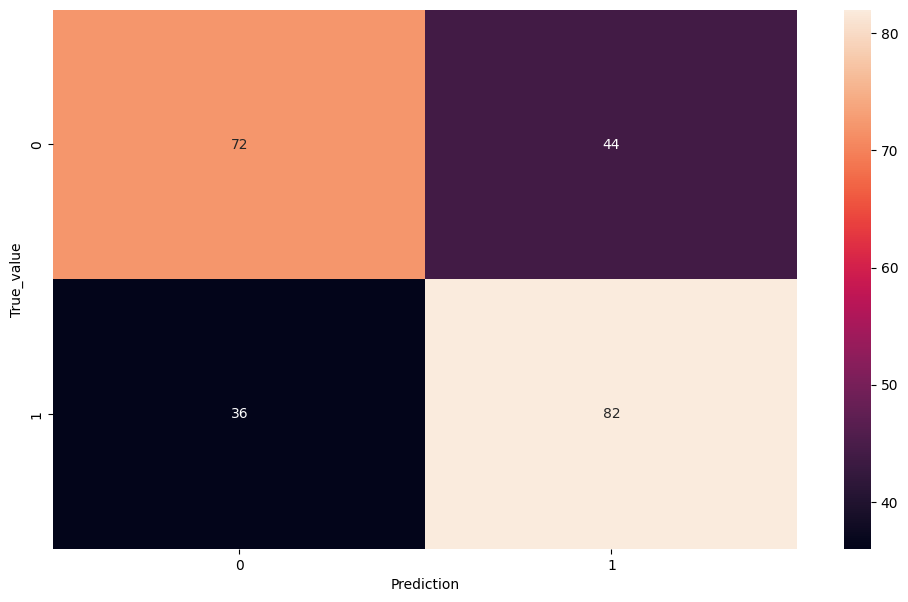

In [ ]:
import tensorflow as tf

#Confusion Matrix - verify accuracy of each class
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

In [ ]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]
# prediction_ANN_rounded[0]
y_test_gender_index = [np.argmax(i) for i in y_gender_test]

Text(120.72222222222221, 0.5, 'True_value')

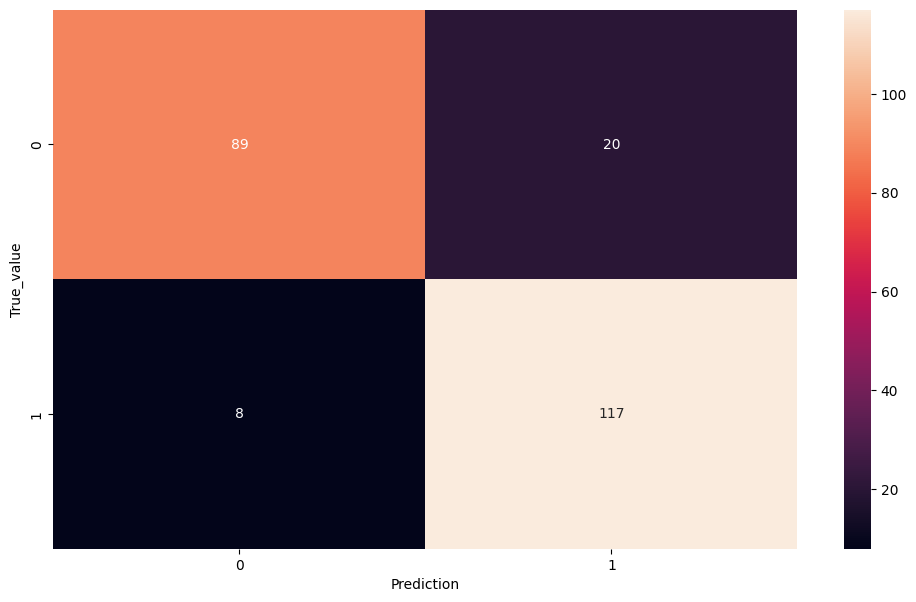

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test_gender_index, predictions = prediction_gender_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       109
           1       0.85      0.94      0.89       125

    accuracy                           0.88       234
   macro avg       0.89      0.88      0.88       234
weighted avg       0.88      0.88      0.88       234



# CNN

### CNN- Accent classification

In [ ]:
def create_cnn_model(input_shape=None):
    # Create CNN model
    input_layer = Input(shape=(13, 862, 1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu', name='conv2')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    # flatten
    flatten = Flatten()(batchnorm5)
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out = Dense(2, activation='sigmoid',name='output')(dropout)
    model = Model(inputs = input_layer ,outputs=out)
    return model


In [ ]:

model_cnn_accent = create_cnn_model()

In [ ]:
model_cnn_accent.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 13, 862, 1)]      0         
                                                                 
 conv2d_36 (Conv2D)          (None, 13, 862, 32)       320       
                                                                 
 batch_normalization_57 (Ba  (None, 13, 862, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 6, 431, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_58 (Ba  (None, 6, 431, 32)        128       
 tchNormalization)                                               
                                                          

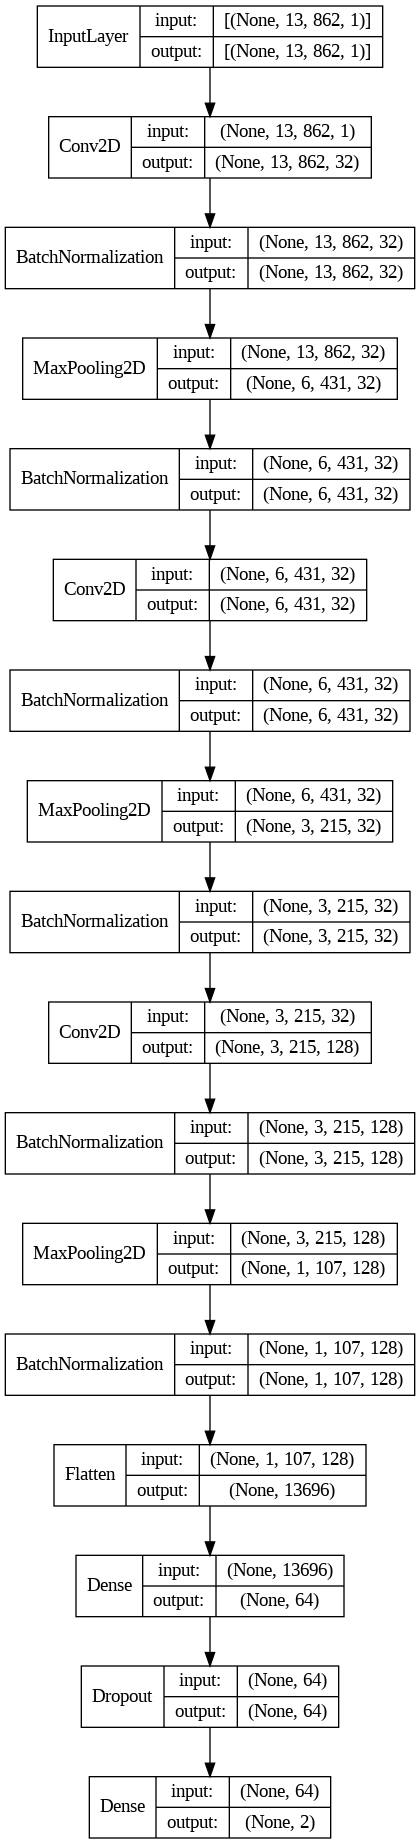

In [ ]:
tf.keras.utils.plot_model(model_cnn_accent, to_file='cnn_model.png', show_shapes=True, show_layer_names=False)


In [ ]:
model_cnn_accent.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_classification_cnn.h5',
                               verbose=1, save_best_only=True,patience=0, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min") #patience=5)

start = datetime.now()

history = model_cnn_accent.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer,early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
22/25 [=========================>....] - ETA: 0s - loss: 1.2244 - accuracy: 0.5952
Epoch 1: val_accuracy improved from -inf to 0.65000, saving model to ./working/saved_models/accent_classification_cnn.h5
25/25 [==============================] - 6s 32ms/step - loss: 1.2039 - accuracy: 0.6061 - val_loss: 0.6829 - val_accuracy: 0.6500
Epoch 2/85
25/25 [==============================] - ETA: 0s - loss: 0.6017 - accuracy: 0.8548
Epoch 2: val_accuracy did not improve from 0.65000
25/25 [==============================] - 0s 18ms/step - loss: 0.6017 - accuracy: 0.8548 - val_loss: 0.8697 - val_accuracy: 0.5286
Training completed in time:  0:00:06.282776


In [ ]:
results_accent = model_cnn_accent.evaluate(X_test, y_accent_test)
print(results_accent)

8/8 [==============================] - 0s 6ms/step - loss: 0.9067 - accuracy: 0.5043
[0.9066787958145142, 0.504273533821106]


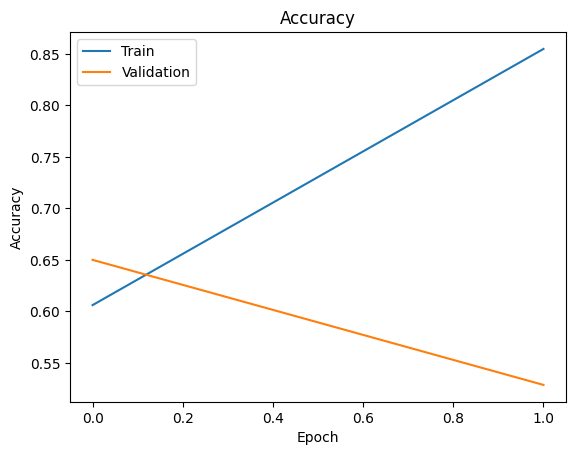

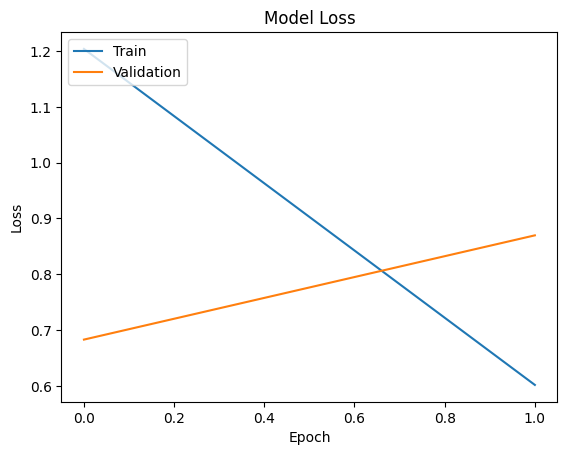

In [ ]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_index, prediction_accent_rounded))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       116
           1       0.65      0.69      0.67       118

    accuracy                           0.66       234
   macro avg       0.66      0.66      0.66       234
weighted avg       0.66      0.66      0.66       234



Text(120.72222222222221, 0.5, 'True_value')

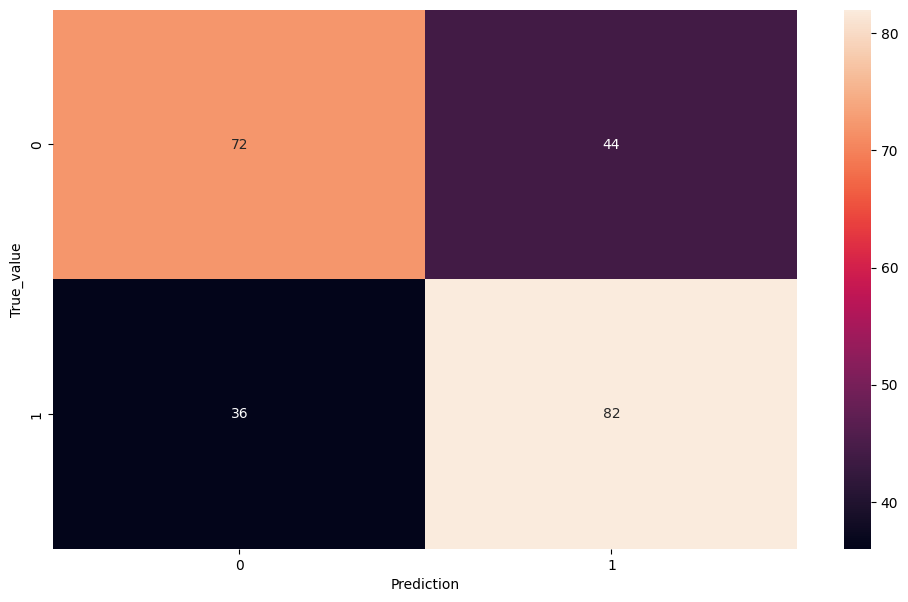

In [ ]:
import tensorflow as tf

#Confusion Matrix - verify accuracy of each class
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

### CNN - Gender classification

In [ ]:
model_cnn_gender = create_cnn_model()

In [ ]:
model_cnn_gender.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/gender_classification_cnn.h5',
                               verbose=1, save_best_only=True,patience=0, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min") #patience=5)

start = datetime.now()

history_gender = model_cnn_gender.fit(X_train, y_gender_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_gender_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
25/25 [==============================] - ETA: 0s - loss: 0.9298 - accuracy: 0.7197
Epoch 1: val_accuracy improved from -inf to 0.75714, saving model to ./working/saved_models/gender_classification_cnn.h5
25/25 [==============================] - 5s 41ms/step - loss: 0.9298 - accuracy: 0.7197 - val_loss: 0.6272 - val_accuracy: 0.7571
Epoch 2/85
24/25 [===========================>..] - ETA: 0s - loss: 0.3003 - accuracy: 0.9414
Epoch 2: val_accuracy improved from 0.75714 to 0.81429, saving model to ./working/saved_models/gender_classification_cnn.h5
25/25 [==============================] - 1s 25ms/step - loss: 0.3071 - accuracy: 0.9394 - val_loss: 0.6514 - val_accuracy: 0.8143
Training completed in time:  0:00:05.601471


In [ ]:
results_gender = model_cnn_gender.evaluate(X_test, y_gender_test)
print(results_gender)

8/8 [==============================] - 0s 6ms/step - loss: 0.6316 - accuracy: 0.8376
[0.6315680742263794, 0.8376068472862244]


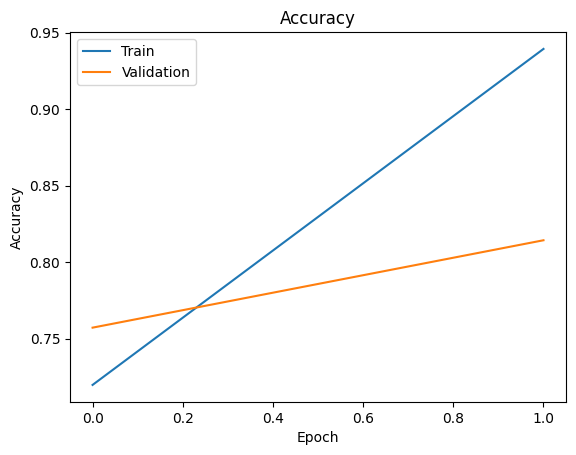

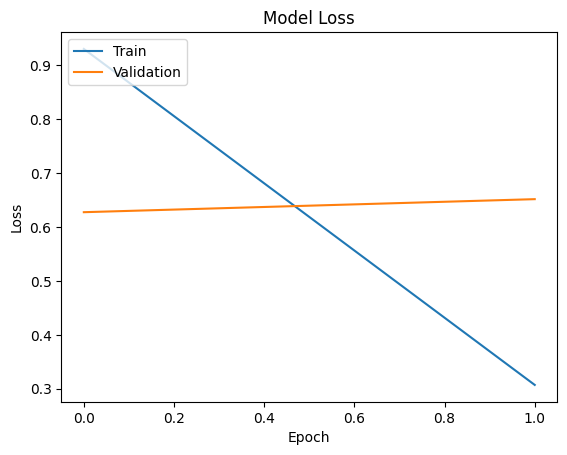

In [ ]:
# Plot training and validation accuracy values
plt.plot(history_gender.history['accuracy'])
plt.plot(history_gender.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history_gender.history['loss'])
plt.plot(history_gender.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

In [ ]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]
# prediction_ANN_rounded[0]
y_test_gender_index = [np.argmax(i) for i in y_gender_test]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       109
           1       0.85      0.94      0.89       125

    accuracy                           0.88       234
   macro avg       0.89      0.88      0.88       234
weighted avg       0.88      0.88      0.88       234



### Multi-task Learning using ConvNets: Accent and Gender

In [ ]:
def create_multitask_cnn():
    # Create CNN model
    input_layer = Input(shape=(13, 862,1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    # flatten
    flatten = Flatten()(batchnorm5)
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model_cnn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])
    return model_cnn

In [ ]:
multitask_cnn = create_multitask_cnn()
multitask_cnn.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 13, 862, 1)]         0         []                            
                                                                                                  
 conv2d_40 (Conv2D)          (None, 13, 862, 32)          320       ['Input[0][0]']               
                                                                                                  
 batch_normalization_69 (Ba  (None, 13, 862, 32)          128       ['conv2d_40[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling2d_44 (MaxPooli  (None, 6, 431, 32)           0         ['batch_normalization_6

In [ ]:
multitask_cnn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_classification_cnn.h5',
                               verbose=1, save_best_only=True,patience=0,  monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min") #patience=10)

start = datetime.now()

history_multitask_cnn = multitask_cnn.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
25/25 [==============================] - ETA: 0s - loss: 2.7255 - output_accent_loss: 1.4654 - output_gender_loss: 1.2601 - output_accent_accuracy: 0.5758 - output_gender_accuracy: 0.6376
Epoch 1: val_loss improved from inf to 1.36485, saving model to ./working/saved_models/multitask_classification_cnn.h5
25/25 [==============================] - 4s 34ms/step - loss: 2.7255 - output_accent_loss: 1.4654 - output_gender_loss: 1.2601 - output_accent_accuracy: 0.5758 - output_gender_accuracy: 0.6376 - val_loss: 1.3648 - val_output_accent_loss: 0.6828 - val_output_gender_loss: 0.6821 - val_output_accent_accuracy: 0.5786 - val_output_gender_accuracy: 0.5857
Epoch 2/85
21/25 [========================>.....] - ETA: 0s - loss: 1.4516 - output_accent_loss: 0.7078 - output_gender_loss: 0.7438 - output_accent_accuracy: 0.7768 - output_gender_accuracy: 0.7887
Epoch 2: val_loss improved from 1.36485 to 1.33271, saving model to ./working/saved_models/multitask_classification_cnn.h5
25/25 [=

In [ ]:
results_multitask_cnn = multitask_cnn.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_cnn)

8/8 [==============================] - 0s 7ms/step - loss: 3.4092 - output_accent_loss: 2.7172 - output_gender_loss: 0.6920 - output_accent_accuracy: 0.6325 - output_gender_accuracy: 0.8547
[3.409224033355713, 2.7171928882598877, 0.6920309662818909, 0.632478654384613, 0.8547008633613586]


In [ ]:
accent_prediction, gender_prediction = multitask_cnn.predict(X_test)
prediction_accent_rounded = [np.argmax(i) for i in accent_prediction]
# prediction_ANN_rounded[0]
y_test_index = [np.argmax(i) for i in y_accent_test]

8/8 [==============================] - 0s 4ms/step


Text(120.72222222222221, 0.5, 'True_value')

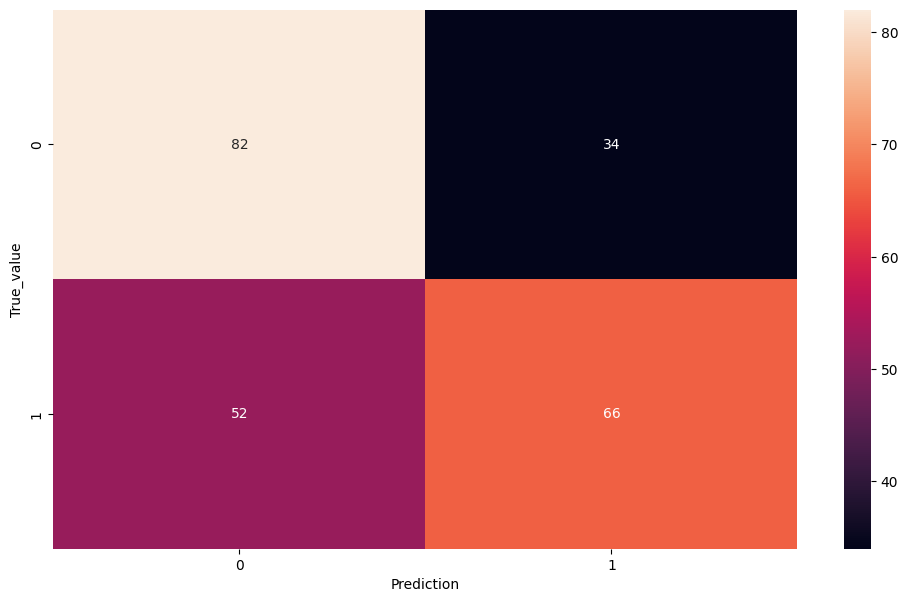

In [ ]:
import tensorflow as tf

#Confusion Matrix - verify accuracy of each class
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

Text(120.72222222222221, 0.5, 'True_value')

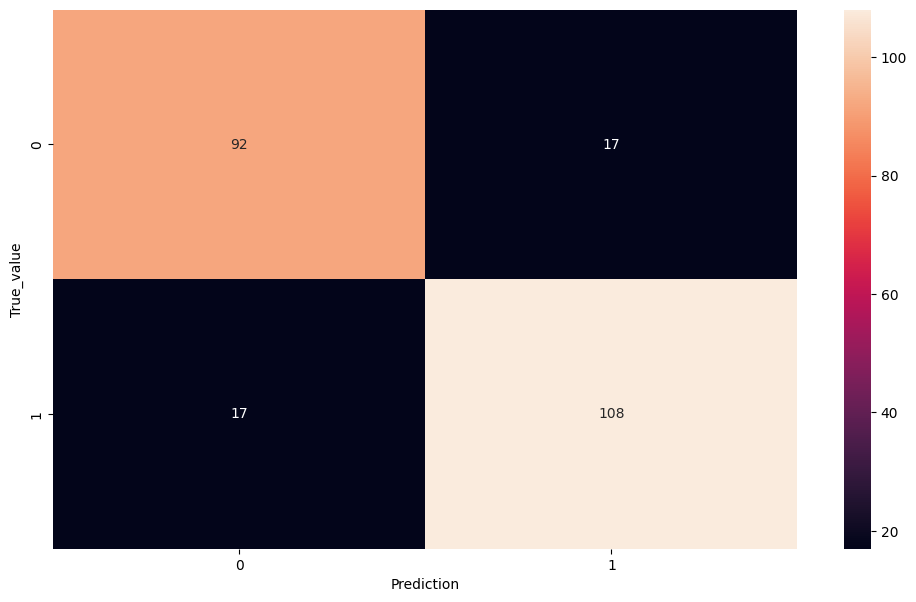

In [ ]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]
# prediction_ANN_rounded[0]
y_test_gender_index = [np.argmax(i) for i in y_gender_test]
cm = tf.math.confusion_matrix(labels = y_test_gender_index, predictions = prediction_gender_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.86      0.86      0.86       125

    accuracy                           0.85       234
   macro avg       0.85      0.85      0.85       234
weighted avg       0.85      0.85      0.85       234



In [ ]:
print(classification_report(y_test_index, prediction_accent_rounded))

              precision    recall  f1-score   support

           0       0.61      0.71      0.66       116
           1       0.66      0.56      0.61       118

    accuracy                           0.63       234
   macro avg       0.64      0.63      0.63       234
weighted avg       0.64      0.63      0.63       234



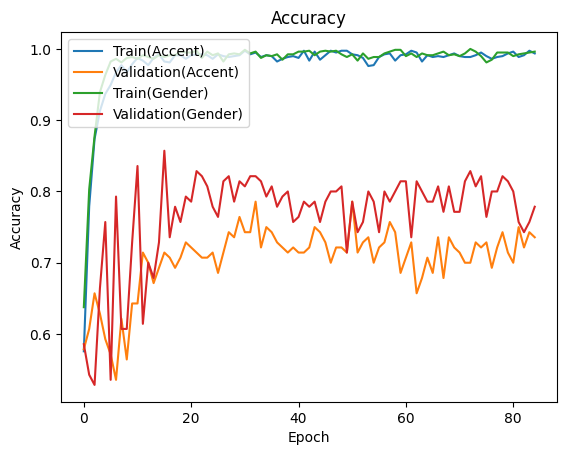

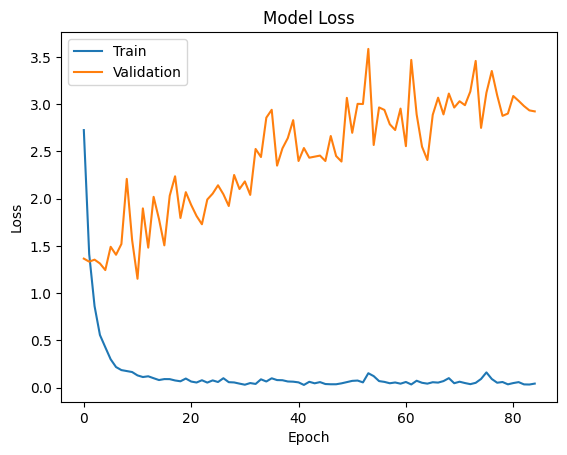

In [ ]:
# Plot training and validation accuracy values
plt.plot(history_multitask_cnn.history['output_accent_accuracy'])
plt.plot(history_multitask_cnn.history['val_output_accent_accuracy'])
plt.plot(history_multitask_cnn.history['output_gender_accuracy'])
plt.plot(history_multitask_cnn.history['val_output_gender_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train(Accent)','Validation(Accent)', 'Train(Gender)','Validation(Gender)'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history_multitask_cnn.history['loss'])
plt.plot(history_multitask_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# LSTM

### LSTM - Accent classification

In [ ]:
def create_LSTM():
    # Create CNN model
    input_layer = Input(shape=(13, 862), name='Input')

    lstm_1 = LSTM(64, return_sequences=True)(input_layer)
    lstm_2 = LSTM(64)(lstm_1)
    dense = Dense(64, activation='relu',name='Hidden_1')(lstm_2)

#     lstm_3 = LSTM(64, stateful=False)(lstm_2)
    dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
#     out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model = Model(inputs = input_layer ,outputs=out_accent)
    return model

In [ ]:
accent_lstm = create_LSTM()

In [ ]:
accent_lstm.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_classification.h5',
                               verbose=1, save_best_only=True,patience=0, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min")# patience=7)

start = datetime.now()

history_accent_lstm = accent_lstm.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
21/25 [========================>.....] - ETA: 0s - loss: 0.6902 - accuracy: 0.5298
Epoch 1: val_accuracy improved from -inf to 0.56429, saving model to ./working/saved_models/accent_classification.h5
25/25 [==============================] - 6s 61ms/step - loss: 0.6886 - accuracy: 0.5354 - val_loss: 0.6729 - val_accuracy: 0.5643
Epoch 2/85
24/25 [===========================>..] - ETA: 0s - loss: 0.6595 - accuracy: 0.6224
Epoch 2: val_accuracy improved from 0.56429 to 0.58571, saving model to ./working/saved_models/accent_classification.h5
25/25 [==============================] - 0s 11ms/step - loss: 0.6600 - accuracy: 0.6187 - val_loss: 0.6608 - val_accuracy: 0.5857
Epoch 3/85
22/25 [=========================>....] - ETA: 0s - loss: 0.5552 - accuracy: 0.7614
Epoch 3: val_accuracy improved from 0.58571 to 0.64286, saving model to ./working/saved_models/accent_classification.h5
25/25 [==============================] - 0s 12ms/step - loss: 0.5538 - accuracy: 0.7513 - val_loss: 0

In [ ]:
results_accent_lstm = accent_lstm.evaluate(X_test, y_accent_test)
print(results_accent_lstm)

8/8 [==============================] - 0s 13ms/step - loss: 0.8432 - accuracy: 0.5940
[0.843177318572998, 0.5940170884132385]


### LSTM multitask

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.models import Model


In [ ]:
def create_LSTM_multi():
    # Create CNN model
    input_layer = Input(shape=(13, 862), name='Input')

#     lstm_1 = LSTM(64, return_sequences=True)(input_layer)
    lstm_2 = LSTM(100)(input_layer)

#     lstm_3 = LSTM(64, stateful=False)(lstm_2)
    dropout = Dropout(0.25)(lstm_2)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model_cnn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])
    return model_cnn

In [ ]:
model = create_LSTM_multi()


In [ ]:
model.summary()


Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 13, 862)]            0         []                            
                                                                                                  
 lstm_11 (LSTM)              (None, 100)                  385200    ['Input[0][0]']               
                                                                                                  
 dropout_28 (Dropout)        (None, 100)                  0         ['lstm_11[0][0]']             
                                                                                                  
 output_accent (Dense)       (None, 2)                    202       ['dropout_28[0][0]']          
                                                                                           

In [ ]:
# Example (after you've trained the model):

# Some sample input data of shape (13, 862)
sample_data = np.random.rand(1, 13, 862)  # Here, we're just generating random data as an example.

predictions = model.predict(sample_data)

print("Accent Prediction:", predictions[0])
print("Gender Prediction:", predictions[1])


1/1 [==============================] - 0s 351ms/step
Accent Prediction: [[0.38421023 0.36544645]]
Gender Prediction: [[0.597504   0.26707628]]


In [ ]:
# Create the CNN-based model
def create_multitask_cnn():
    # Create CNN model
    input_layer = Input(shape=(13, 862,1), name='cnn_output')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    # flatten
    flatten = Flatten()(batchnorm5)
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model_cnn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])
    return model_cnn

In [ ]:
model = create_multitask_cnn()


In [ ]:
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cnn_output (InputLayer)     [(None, 13, 862, 1)]         0         []                            
                                                                                                  
 conv2d_43 (Conv2D)          (None, 13, 862, 32)          320       ['cnn_output[0][0]']          
                                                                                                  
 batch_normalization_75 (Ba  (None, 13, 862, 32)          128       ['conv2d_43[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling2d_47 (MaxPooli  (None, 6, 431, 32)           0         ['batch_normalization_7

In [ ]:
# Example (after you've trained the model):

# Some sample input data of shape (13, 862)
sample_data = np.random.rand(1, 13, 862)  # Here, we're just generating random data as an example.

predictions = model.predict(sample_data)

print("Accent Prediction:", predictions[0])
print("Gender Prediction:", predictions[1])


1/1 [==============================] - 0s 193ms/step
Accent Prediction: [[0.45416   0.5346625]]
Gender Prediction: [[0.4568064 0.5117216]]


In [ ]:
multitask_lstm = create_LSTM_multi()

In [ ]:
multitask_lstm.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_classification_lstm.h5',
                               verbose=1, save_best_only=True,patience=0, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min") #patience=10)

start = datetime.now()

history_multitask_lstm = multitask_lstm.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
24/25 [===========================>..] - ETA: 0s - loss: 1.3777 - output_accent_loss: 0.6809 - output_gender_loss: 0.6969 - output_accent_accuracy: 0.5742 - output_gender_accuracy: 0.5833
Epoch 1: val_loss improved from inf to 1.34219, saving model to ./working/saved_models/multitask_classification_lstm.h5
25/25 [==============================] - 4s 65ms/step - loss: 1.3746 - output_accent_loss: 0.6811 - output_gender_loss: 0.6935 - output_accent_accuracy: 0.5745 - output_gender_accuracy: 0.5859 - val_loss: 1.3422 - val_output_accent_loss: 0.6553 - val_output_gender_loss: 0.6869 - val_output_accent_accuracy: 0.6143 - val_output_gender_accuracy: 0.5500
Epoch 2/85
25/25 [==============================] - ETA: 0s - loss: 1.1325 - output_accent_loss: 0.5530 - output_gender_loss: 0.5796 - output_accent_accuracy: 0.7891 - output_gender_accuracy: 0.7311
Epoch 2: val_loss improved from 1.34219 to 1.32054, saving model to ./working/saved_models/multitask_classification_lstm.h5
25/25 

In [ ]:
results_multitask_lstm = multitask_lstm.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_lstm)

8/8 [==============================] - 0s 6ms/step - loss: 5.3989 - output_accent_loss: 2.7804 - output_gender_loss: 2.6185 - output_accent_accuracy: 0.6026 - output_gender_accuracy: 0.5940
[5.398936748504639, 2.780423879623413, 2.6185128688812256, 0.6025640964508057, 0.5940170884132385]


In [ ]:
# Create the CNN-based model
def create_multitask_cnn():
    input_layer = Input(shape=(13, 862,1), name='cnn_input')

    x = Conv2D(32, (3,3), activation='relu')(input_layer)
    x = MaxPooling2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)

    out_accent_cnn = Dense(2, activation='sigmoid', name='cnn_output_accent')(x)
    out_gender_cnn = Dense(2, activation='sigmoid', name='cnn_output_gender')(x)

    model_cnn = Model(inputs=input_layer, outputs=[out_accent_cnn, out_gender_cnn])
    return model_cnn

# Create a combined model
def create_hybrid_model():
    lstm_model = create_LSTM_multi()
    cnn_model = create_multitask_cnn()

    # Merge LSTM and CNN outputs
    combined_input = Concatenate()([lstm_model.output[0], cnn_model.output[0], lstm_model.output[1], cnn_model.output[1]])

    # Define final outputs
    final_output_accent = Dense(2, activation='sigmoid', name='final_output_accent')(combined_input)
    final_output_gender = Dense(2, activation='sigmoid', name='final_output_gender')(combined_input)

    hybrid_model = Model(inputs=[lstm_model.input, cnn_model.input], outputs=[final_output_accent, final_output_gender])
    return hybrid_model


In [ ]:
# Assuming the create_LSTM_multi(), create_multitask_cnn(), and create_hybrid_model()
# functions are defined as in the previous response:

# Create the hybrid model
hybrid_model = create_hybrid_model()

# Compile the hybrid model
hybrid_model.compile(
    optimizer='Adam',
    loss={'final_output_accent': 'binary_crossentropy', 'final_output_gender': 'binary_crossentropy'},
    metrics={'final_output_accent': 'accuracy', 'final_output_gender': 'accuracy'}
)

# Assuming X_train and X_val are currently shaped for CNN:
X_train_cnn = X_train
X_val_cnn = X_val

# Reshape them for LSTM:
X_train_lstm = X_train.reshape(X_train.shape[:-1])
X_val_lstm = X_val.reshape(X_val.shape[:-1])

# Print the model summary
hybrid_model.summary()

# Define batch size and number of epochs
num_batch_size = 85
num_epochs = 32

# Train hybrid model
history = hybrid_model.fit(
    [X_train_lstm, X_train_cnn],  # Provide inputs for both LSTM and CNN
    {"final_output_accent": y_accent_train, "final_output_gender": y_gender_train},
    validation_data=([X_val_lstm, X_val_cnn], {"final_output_accent": y_accent_val, "final_output_gender": y_gender_val}),
    batch_size=num_batch_size,
    epochs=num_epochs,
)

# Optionally, you can save the model after training
# hybrid_model.save('hybrid_model.h5')


Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cnn_input (InputLayer)      [(None, 13, 862, 1)]         0         []                            
                                                                                                  
 conv2d_46 (Conv2D)          (None, 11, 860, 32)          320       ['cnn_input[0][0]']           
                                                                                                  
 Input (InputLayer)          [(None, 13, 862)]            0         []                            
                                                                                                  
 max_pooling2d_50 (MaxPooli  (None, 5, 430, 32)           0         ['conv2d_46[0][0]']           
 ng2D)                                                                                     

In [ ]:
#from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Activation, Concatenate, GlobalAveragePooling2D
#from tensorflow.keras.models import Model

# Create the LSTM-based model
#def create_LSTM_multi():
    #input_layer = Input(shape=(13, 862), name='lstm_input')
    #lstm_2 = LSTM(100)(input_layer)
    #dropout = Dropout(0.25)(lstm_2)
   # out_accent = Dense(2, activation='sigmoid', name='lstm_output_accent')(dropout)
   # out_gender = Dense(2, activation='sigmoid', name='lstm_output_gender')(dropout)
  #  model_lstm = Model(inputs=input_layer, outputs=[out_accent, out_gender])
 #   return model_lstm

# Create the CNN-based model
#def create_multitask_cnn():
    #input_layer = Input(shape=(13, 862, 1), name='cnn_input')

    #x = Conv2D(32, kernel_size=(3, 3), padding='same')(input_layer)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)

    #x = Conv2D(64, kernel_size=(3, 3), padding='same')(x)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)

    #x = Conv2D(128, kernel_size=(3, 3), padding='same')(x)
    #x = BatchNormalization()(x)
    #x = Activation('relu')(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)

    #x = Flatten()(x)
    #x = Dense(256, activation='relu')(x)
    #x = Dropout(0.5)(x)

    #out_accent = Dense(2, activation='sigmoid', name='cnn_output_accent')(x)
   # out_gender = Dense(2, activation='sigmoid', name='cnn_output_gender')(x)

  #  model_cnn = Model(inputs=input_layer, outputs=[out_accent, out_gender])
 #   return model_cnn

# Create a combined model
#def create_hybrid_model():
    #lstm_model = create_LSTM_multi()
    #cnn_model = create_multitask_cnn()

    #combined_input_layer = [lstm_model.input, cnn_model.input]
    #combined_output_layer = [lstm_model.get_layer('lstm_output_accent').output, lstm_model.get_layer('lstm_output_gender').output, cnn_model.get_layer('cnn_output_accent').output, cnn_model.get_layer('cnn_output_gender').output]

    # You can now combine these outputs in numerous ways, e.g., concatenating
    #concat_accent = Concatenate()([combined_output_layer[0], combined_output_layer[2]])
    #concat_gender = Concatenate()([combined_output_layer[1], combined_output_layer[3]])

    #final_accent = Dense(2, activation='sigmoid', name='final_output_accent')(concat_accent)
   # final_gender = Dense(2, activation='sigmoid', name='final_output_gender')(concat_gender)

  #  hybrid_model = Model(inputs=combined_input_layer, outputs=[final_accent, final_gender])
 #   return hybrid_model

# Create the hybrid model
#hybrid_model = create_hybrid_model()

# Compile the hybrid model
#hybrid_model.compile(
   # optimizer='Adam',
  #  loss={'final_output_accent': 'binary_crossentropy', 'final_output_gender': 'binary_crossentropy'},
 #   metrics={'final_output_accent': 'accuracy', 'final_output_gender': 'accuracy'}
#)

# Assuming X_train and X_val are currently shaped for CNN:
#X_train_cnn = X_train
#X_val_cnn = X_val

# Reshape them for LSTM:
#X_train_lstm = X_train.reshape(X_train.shape[:-1])
#X_val_lstm = X_val.reshape(X_val.shape[:-1])

# Print the model summary
#hybrid_model.summary()

# Define batch size and number of epochs
#num_batch_size = 32
#num_epochs = 35

# Train hybrid model
#hybrid_model.fit(
   # [X_train_lstm, X_train_cnn],
   # {"final_output_accent": y_accent_train, "final_output_gender": y_gender_train},
   # validation_data=([X_val_lstm, X_val_cnn], {"final_output_accent": y_accent_val, "final_output_gender": y_gender_val}),
  #  batch_size=num_batch_size,
  #  epochs=num_epochs,
#)


In [ ]:
#from tensorflow.keras.layers import Concatenate

# Create the LSTM-based model
#def create_LSTM_multi():
    # Create CNN model
    #input_layer = Input(shape=(13, 862), name='lstm_input')  # Unique name for LSTM input

   # lstm_2 = LSTM(100)(input_layer)

   # dropout = Dropout(0.25)(lstm_2)

    # Update output layer names to make them unique within the LSTM-based model
  #  out_accent = Dense(2, activation='sigmoid', name='lstm_output_accent')(dropout)
   # out_gender = Dense(2, activation='sigmoid', name='lstm_output_gender')(dropout)

   # model_lstm = Model(inputs=input_layer, outputs=[out_accent, out_gender])
    #return model_lstm

# Create the CNN-based model
#def create_multitask_cnn():
    # Create CNN model
    #input_layer = Input(shape=(13, 862,1), name='cnn_output')
    # conv 1
    #conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
   # batchnorm = BatchNormalization()(conv)
    #maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    #batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    #conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
   # batchnorm2 = BatchNormalization()(conv1)
    #maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
    #batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    #conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
    #batchnorm4 = BatchNormalization()(conv2)
   # maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    #batchnorm5 = BatchNormalization()(maxpool2)
    # flatten
    #flatten = Flatten()(batchnorm5)
    #dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    #dropout = Dropout(0.5)(dense)
    # output
   # out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
   # out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

   # model_cnn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])
   # return model_cnn

# Create a combined model
#def create_hybrid_model():
    # Create the LSTM-based model
   # lstm_model = create_LSTM_multi()

    # Create the CNN-based model
    #cnn_model = create_multitask_cnn()

    # Get the output layers of each model
    #lstm_output_accent = lstm_model.get_layer('lstm_output_accent').output
    #lstm_output_gender = lstm_model.get_layer('lstm_output_gender').output

    #cnn_output_accent = cnn_model.get_layer('output_accent').output
    #cnn_output_gender = cnn_model.get_layer('output_gender').output

    # Concatenate the outputs from both models
   # combined_output_accent = Concatenate(axis=-1)([lstm_output_accent, cnn_output_accent])
   # combined_output_gender = Concatenate(axis=-1)([lstm_output_gender, cnn_output_gender])

    # Additional processing layers (you can customize these as needed)
   # combined_output_accent = Dense(32, activation='relu')(combined_output_accent)
   # combined_output_gender = Dense(32, activation='relu')(combined_output_gender)

    # Final output layers for both tasks
   # out_accent = Dense(2, activation='sigmoid', name='final_output_accent')(combined_output_accent)
   # out_gender = Dense(2, activation='sigmoid', name='final_output_gender')(combined_output_gender)

    # Create the hybrid model
    #hybrid_model = Model(
      #  inputs=[lstm_model.input, cnn_model.input],
      #  outputs=[out_accent, out_gender]
    #)

   # return hybrid_model

# Create the hybrid model
#hybrid_model = create_hybrid_model()

# Compile the hybrid model
#hybrid_model.compile(
  #  optimizer='Adam',
   # loss={'final_output_accent': 'binary_crossentropy', 'final_output_gender': 'binary_crossentropy'},
   # metrics={'final_output_accent': 'accuracy', 'final_output_gender': 'accuracy'}
#)

# Assuming X_train and X_val are currently shaped for CNN:
#X_train_cnn = X_train
#X_val_cnn = X_val

# Reshape them for LSTM:
#X_train_lstm = X_train.reshape(X_train.shape[:-1])
#X_val_lstm = X_val.reshape(X_val.shape[:-1])


# Print the model summary
#hybrid_model.summary()

# Define batch size and number of epochs
#num_batch_size = 32
num_epochs = 35

# Train hybrid model
#hybrid_model.fit(
    #X_train,
   # {"final_output_accent": y_accent_train, "final_output_gender": y_gender_train},
    #validation_data=(X_val, {"final_output_accent": y_accent_val, "final_output_gender": y_gender_val}),
   #batch_size=num_batch_size,
  #  epochs=num_epochs,
#)


# CRNN

### CRNN - Accent classificaiton

In [ ]:
from tensorflow.keras.layers import Dense, Permute, Reshape
# from tensorflow.keras.layers.wrappers import Bidirectional
from tensorflow.keras.layers import Bidirectional
def create_CRNN_model(input_shape, config, is_training=True):

    model = Sequential()

    model.add(Conv2D(32, 3, activation="relu",padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, 3, activation="relu",padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 3, activation="relu",padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Convolution2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


#     input_layer = Input(shape=(13, 862,1), name='Input')
#     # conv 1
#     conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
#     batchnorm = BatchNormalization()(conv)
#     maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
#     batchnorm1 = BatchNormalization()(maxpool)
#     # conv 2
#     conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
#     batchnorm2 = BatchNormalization()(conv1)
#     maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
#     batchnorm3 = BatchNormalization()(maxpool1)
#     # conv 3
#     conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
#     batchnorm4 = BatchNormalization()(conv2)
#     maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
#     batchnorm5 = BatchNormalization()(maxpool2)

    # (bs, y, x, c) --> (bs, x, y, c)
    model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
    bs, x, y, c = model.layers[-1].output_shape
    model.add(Reshape((x, y*c)))

    model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
    model.add(Dense(2, activation="sigmoid"))


    return model

In [ ]:
crnn_model = create_CRNN_model((13,862,1), config)

In [ ]:
crnn_model.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_crnn_classification.h5',
                               verbose=1, save_best_only=True,patience=0, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min") #patience=5)

start = datetime.now()

history_accent_lstm = crnn_model.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
23/25 [==========================>...] - ETA: 0s - loss: 0.6721 - accuracy: 0.6250
Epoch 1: val_accuracy improved from -inf to 0.62143, saving model to ./working/saved_models/accent_crnn_classification.h5
25/25 [==============================] - 8s 70ms/step - loss: 0.6679 - accuracy: 0.6301 - val_loss: 0.6765 - val_accuracy: 0.6214
Epoch 2/85
25/25 [==============================] - ETA: 0s - loss: 0.5041 - accuracy: 0.7715
Epoch 2: val_accuracy did not improve from 0.62143
25/25 [==============================] - 1s 28ms/step - loss: 0.5041 - accuracy: 0.7715 - val_loss: 0.6709 - val_accuracy: 0.5357
Epoch 3/85
24/25 [===========================>..] - ETA: 0s - loss: 0.4001 - accuracy: 0.8438
Epoch 3: val_accuracy did not improve from 0.62143
25/25 [==============================] - 1s 28ms/step - loss: 0.4036 - accuracy: 0.8396 - val_loss: 0.7535 - val_accuracy: 0.5286
Training completed in time:  0:00:09.657727


In [ ]:
from keras.models import load_model
crnn_accent_model = load_model('./working/saved_models/accent_crnn_classification.h5')
results_accent_crnn = crnn_accent_model.evaluate(X_test, y_accent_test)
print(results_accent_crnn)

8/8 [==============================] - 1s 17ms/step - loss: 0.6858 - accuracy: 0.5684
[0.6857709288597107, 0.5683760643005371]


### CRNN - Gender Classification

In [ ]:
crnn_model_gender = create_CRNN_model((13,862,1), config)

In [ ]:
crnn_model_gender.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
## Trianing my model

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/gender_crnn_classification.h5',
                               verbose=1, save_best_only=True,patience=0, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min") #patience=5)

start = datetime.now()

history_gender_crnn = crnn_model_gender.fit(X_train, y_gender_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_gender_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
24/25 [===========================>..] - ETA: 0s - loss: 0.6311 - accuracy: 0.6719
Epoch 1: val_accuracy improved from -inf to 0.73571, saving model to ./working/saved_models/gender_crnn_classification.h5
25/25 [==============================] - 8s 73ms/step - loss: 0.6292 - accuracy: 0.6730 - val_loss: 0.6444 - val_accuracy: 0.7357
Epoch 2/85
25/25 [==============================] - ETA: 0s - loss: 0.3351 - accuracy: 0.8573
Epoch 2: val_accuracy did not improve from 0.73571
25/25 [==============================] - 1s 30ms/step - loss: 0.3351 - accuracy: 0.8573 - val_loss: 0.6958 - val_accuracy: 0.5143
Training completed in time:  0:00:08.733502


In [ ]:
from keras.models import load_model
crnn_gender_model = load_model('./working/saved_models/gender_crnn_classification.h5')
results_agender_crnn = crnn_gender_model.evaluate(X_test, y_gender_test)
print(results_agender_crnn)

8/8 [==============================] - 1s 19ms/step - loss: 0.6434 - accuracy: 0.7308
[0.6434181332588196, 0.7307692170143127]


### Multitask Learning- CRNN

In [ ]:
def create_CRNN_multitask_model():

#     model = Sequential()

#     model.add(Conv2D(64, 3, activation="relu",padding='same', input_shape=input_shape))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Convolution2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


    input_layer = Input(shape=(13, 862,1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(maxpool)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)

    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(maxpool1)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)

    permute = Permute((2, 1, 3))(maxpool2)
    reshaped = Reshape((107, 128))(permute)

    lstm = Bidirectional(LSTM(256, return_sequences=False))(reshaped)

    out_accent = Dense(2, activation='sigmoid',name='output_accent')(lstm)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(lstm)

    # (bs, y, x, c) --> (bs, x, y, c)
#     model.add(Permute((2, 1, 3)))

#     # (bs, x, y, c) --> (bs, x, y * c)
#     bs, x, y, c = model.layers[-1].output_shape
#     model.add(Reshape((x, y*c)))

#     model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
#     model.add([Dense(2, activation="sigmoid", name='output_accent'),Dense(2, activation="sigmoid", name='output_gender')])
    model = Model(inputs = input_layer ,outputs=[out_accent, out_gender])

    return model

In [ ]:
multitask_crnn = create_CRNN_multitask_model()

In [ ]:
multitask_crnn.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 13, 862, 1)]         0         []                            
                                                                                                  
 conv2d_17 (Conv2D)          (None, 13, 862, 32)          320       ['Input[0][0]']               
                                                                                                  
 batch_normalization_30 (Ba  (None, 13, 862, 32)          128       ['conv2d_17[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling2d_19 (MaxPooli  (None, 6, 431, 32)           0         ['batch_normalization_3

In [ ]:
multitask_crnn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_classification_crnn.h5',
                               verbose=1, save_best_only=True,patience=0, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min") #patience=5)

start = datetime.now()

history_multitask_crnn = multitask_crnn.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
23/25 [==========================>...] - ETA: 0s - loss: 1.3127 - output_accent_loss: 0.6754 - output_gender_loss: 0.6374 - output_accent_accuracy: 0.6005 - output_gender_accuracy: 0.6413
Epoch 1: val_loss improved from inf to 1.34068, saving model to ./working/saved_models/multitask_classification_crnn.h5
25/25 [==============================] - 9s 101ms/step - loss: 1.2968 - output_accent_loss: 0.6743 - output_gender_loss: 0.6225 - output_accent_accuracy: 0.5997 - output_gender_accuracy: 0.6528 - val_loss: 1.3407 - val_output_accent_loss: 0.6778 - val_output_gender_loss: 0.6629 - val_output_accent_accuracy: 0.6429 - val_output_gender_accuracy: 0.5357
Epoch 2/85
25/25 [==============================] - ETA: 0s - loss: 0.9178 - output_accent_loss: 0.5559 - output_gender_loss: 0.3620 - output_accent_accuracy: 0.7348 - output_gender_accuracy: 0.8346
Epoch 2: val_loss did not improve from 1.34068
25/25 [==============================] - 1s 33ms/step - loss: 0.9178 - output_acce

In [ ]:
from keras.models import load_model
crnn_multi_model = load_model('./working/saved_models/multitask_classification_crnn.h5')
results_multitask_crnn = crnn_multi_model.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

8/8 [==============================] - 1s 19ms/step - loss: 1.3503 - output_accent_loss: 0.6836 - output_gender_loss: 0.6667 - output_accent_accuracy: 0.5812 - output_gender_accuracy: 0.5128
[1.3503044843673706, 0.6835734844207764, 0.6667308807373047, 0.5811966061592102, 0.5128205418586731]


8/8 [==============================] - 1s 13ms/step


Text(120.72222222222221, 0.5, 'True_value')

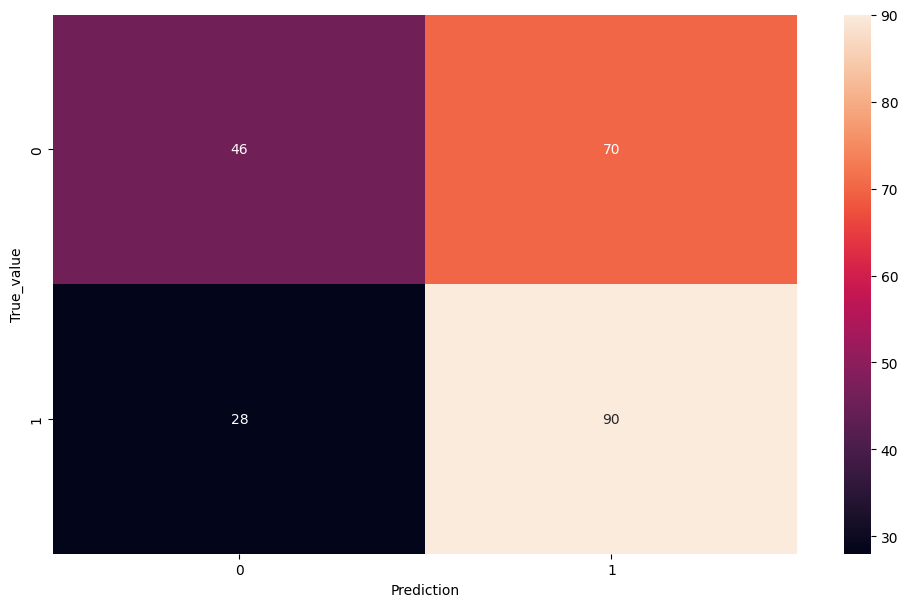

In [ ]:
accent_prediction, gender_prediction = crnn_multi_model.predict(X_test)

prediction_accent_rounded = [np.argmax(i) for i in accent_prediction]

# prediction_ANN_rounded[0]

y_test_index = [np.argmax(i) for i in y_accent_test]


import tensorflow as tf


#Confusion Matrix - verify accuracy of each class

import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)

plt.figure(figsize = (12,7))

sns.heatmap(cm,annot=True, fmt='d')

plt.xlabel('Prediction')

plt.ylabel('True_value')




Text(120.72222222222221, 0.5, 'True_value')

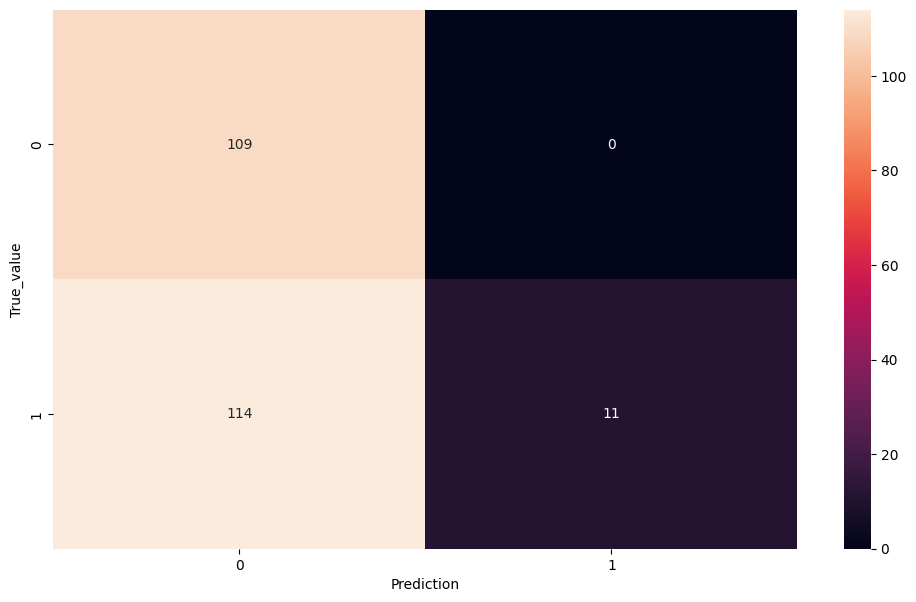

In [ ]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]

# prediction_ANN_rounded[0]

y_test_gender_index = [np.argmax(i) for i in y_gender_test]

cm = tf.math.confusion_matrix(labels = y_test_gender_index, predictions = prediction_gender_rounded)

plt.figure(figsize = (12,7))

sns.heatmap(cm,annot=True, fmt='d')

plt.xlabel('Prediction')

plt.ylabel('True_value')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       109
           1       1.00      0.09      0.16       125

    accuracy                           0.51       234
   macro avg       0.74      0.54      0.41       234
weighted avg       0.76      0.51      0.39       234



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_index, prediction_accent_rounded))

              precision    recall  f1-score   support

           0       0.62      0.40      0.48       116
           1       0.56      0.76      0.65       118

    accuracy                           0.58       234
   macro avg       0.59      0.58      0.57       234
weighted avg       0.59      0.58      0.57       234



# Testing All the models

prepare test samples

In [ ]:
test_data = test_data[test_data['file_missing?']==False]

In [ ]:
test_data.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,NaN,NaN,NaN
33,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,False,NaN,NaN,NaN
34,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,False,NaN,NaN,NaN
35,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,False,NaN,NaN,NaN
36,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,False,NaN,NaN,NaN


In [ ]:
test_data['native_language'].value_counts()

turkish     37
german      36
polish      34
italian     33
japanese    27
            ..
konkani      1
kirghiz      1
kanuri       1
kannada      1
zulu         1
Name: native_language, Length: 193, dtype: int64

In [ ]:
test_data[test_data['sex']=='female'].head(20)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
32,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,NaN,NaN,NaN
44,25.0,11.0,"prishtina, kosovo",albanian6,albanian,female,1081,kosovo,False,NaN,NaN,NaN
45,45.0,11.0,"prishtina, kosovo",albanian7,albanian,female,1403,kosovo,False,NaN,NaN,NaN
46,43.0,9.0,"prishtina, kosovo",albanian8,albanian,female,1404,kosovo,False,NaN,NaN,NaN
47,22.0,6.0,"tirana, albania",albanian9,albanian,female,1706,albania,False,NaN,NaN,NaN
50,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,False,NaN,NaN,NaN
51,29.0,19.0,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia,False,NaN,NaN,NaN
52,24.0,17.0,"addis ababa, ethiopia",amharic11,amharic,female,1129,ethiopia,False,NaN,NaN,NaN
53,26.0,15.0,"addis ababa, ethiopia",amharic12,amharic,female,1130,ethiopia,False,NaN,NaN,NaN
54,28.0,6.0,"addis ababa, ethiopia",amharic13,amharic,female,1131,ethiopia,False,NaN,NaN,NaN


In [ ]:
test_data['filename'] = test_data['filename'].apply(lambda x: x+'.mp3')

In [ ]:
f_female_non_native = ['twi1.mp3']

In [ ]:
data_path = './data/recordings/'
config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=13, n_classes=2)
X_female_non_native = prepare_data(f_female_non_native, config, data_path)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Play
fname_m = './data/recordings/' + 'twi1.mp3'
ipd.Audio(fname_m)

In [ ]:


a=encoder.transform(['female'])
y_female_non_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_female_non_native_gender)

[[1. 0.]]


In [ ]:
encoder1.transform(['non-native'])

array([1])

In [ ]:
encoder.transform(['female'])

array([0])

# Label Encoding:
Female - 0
Male  - 1

Native - 0
Non-native - 1

In [ ]:
a=encoder1.transform(['non-native'])
y_female_non_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_female_non_native_accent)

[[0. 1.]]


In [ ]:
pred = crnn_multi_model.predict(X_female_non_native)

1/1 [==============================] - 0s 57ms/step


In [ ]:
print("X=%s, Accent Predicted=%s" % (pred[0], y_female_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred[1], y_female_non_native_gender[0]))

X=[[0.46743202 0.38396266]], Accent Predicted=[0. 1.]
X=[[0.71052665 0.35191396]], Gender Predicted=[1. 0.]


In [ ]:
from keras.models import load_model
cnn_multi_model = load_model('./working/saved_models/multitask_classification_cnn.h5')
pred1 = cnn_multi_model.predict(X_female_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_female_non_native_gender[0]))

1/1 [==============================] - 0s 111ms/step
X=[[1. 1.]], Accent Predicted=[0. 1.]
X=[[7.583022e-07 1.000000e+00]], Gender Predicted=[1. 0.]


African Male accent

In [ ]:
f_male_non_native = ['twi2.mp3']
X_male_non_native = prepare_data(f_female_non_native, config, data_path)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
a=encoder.transform(['male'])
y_male_non_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_male_non_native_gender)

[[0. 1.]]


In [ ]:
a=encoder1.transform(['non-native'])
y_male_non_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_male_non_native_accent)

[[0. 1.]]


In [ ]:
from keras.models import load_model
cnn_multi_model = load_model('./working/saved_models/multitask_classification_cnn.h5')
pred = cnn_multi_model.predict(X_male_non_native)

1/1 [==============================] - 0s 124ms/step


In [ ]:
print("X=%s, Accent Predicted=%s" % (pred[0], y_male_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred[1], y_male_non_native_gender[0]))

X=[[1. 1.]], Accent Predicted=[0. 1.]
X=[[5.57014e-12 1.00000e+00]], Gender Predicted=[0. 1.]


In [ ]:
pred1 = crnn_multi_model.predict(X_male_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_non_native_gender[0]))

1/1 [==============================] - 0s 23ms/step
X=[[0.5040276 0.3989052]], Accent Predicted=[0. 1.]
X=[[0.736645   0.37002105]], Gender Predicted=[0. 1.]


English Male

In [ ]:
file = './data/recordings/english139.mp3'

In [ ]:
X_male_native = prepare_data(['english139.mp3'], config, './data/recordings')

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
a=encoder.transform(['male'])
y_male_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_male_native_gender)

[[0. 1.]]


In [ ]:
a=encoder1.transform(['native'])
y_male_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_male_native_accent)

[[1. 0.]]


In [ ]:
pred1 = crnn_multi_model.predict(X_male_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

1/1 [==============================] - 0s 29ms/step
X=[[0.48334265 0.43109843]], Accent Predicted=[1. 0.]
X=[[0.6638501 0.3755646]], Gender Predicted=[0. 1.]


In [ ]:
pred1 = cnn_multi_model.predict(X_male_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

1/1 [==============================] - 0s 17ms/step
X=[[1. 1.]], Accent Predicted=[1. 0.]
X=[[1.2147685e-11 1.0000000e+00]], Gender Predicted=[0. 1.]


US female

In [ ]:
filename = './data/recordings/english420.mp3'

In [ ]:
X_female_native = prepare_data(['english420.mp3'], config, './data/recordings')

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
a=encoder.transform(['female'])
y_female_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_female_native_gender)
a=encoder1.transform(['native'])
y_female_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_female_native_accent)

[[1. 0.]]
[[1. 0.]]


In [ ]:
pred1 = crnn_multi_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

pred1 = cnn_multi_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

1/1 [==============================] - 0s 28ms/step
X=[[0.47732592 0.41380596]], Accent Predicted=[1. 0.]
X=[[0.68646055 0.3770193 ]], Gender Predicted=[0. 1.]
1/1 [==============================] - 0s 21ms/step
X=[[1. 1.]], Accent Predicted=[1. 0.]
X=[[8.9330506e-08 1.0000000e+00]], Gender Predicted=[0. 1.]


In [ ]:
from keras.models import load_model
cnn_accent_model = load_model('./working/saved_models/accent_classification_cnn.h5')
cnn_gender_model = load_model('./working/saved_models/gender_classification_cnn.h5')
ffn_multi_model = load_model('./working/saved_models/audio_classification_ffn.hdf5')
pred1 = cnn_accent_model.predict(X_female_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_female_native_accent[0]))
pred1 = cnn_accent_model.predict(X_male_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_male_native_accent[0]))
pred1 = cnn_accent_model.predict(X_male_non_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_male_non_native_accent[0]))
pred1 = ffn_multi_model.predict(X_female_non_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_female_non_native_accent[0]))
pred1 = cnn_gender_model.predict(X_female_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_female_native_gender[0]))

1/1 [==============================] - 0s 193ms/step
Accent Predicted=[0.99973553 0.11607058], X=[1. 0.]
1/1 [==============================] - 0s 30ms/step
Accent Predicted=[1.0000000e+00 3.6676692e-08], X=[1. 0.]
1/1 [==============================] - 0s 30ms/step
Accent Predicted=[0.9999964  0.05366815], X=[0. 1.]
1/1 [==============================] - 0s 185ms/step
Accent Predicted=[[3.3861148e-14 5.8340824e-01]], X=[0. 1.]
1/1 [==============================] - 0s 207ms/step
Accent Predicted=[1. 1.], X=[1. 0.]


In [ ]:
from keras.models import load_model
crnn_accent_model = load_model('./working/saved_models/accent_crnn_classification.h5')
crnn_gender_model = load_model('./working/saved_models/gender_crnn_classification.h5')
pred1 = crnn_accent_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_native_accent[0]))
pred1 = crnn_gender_model.predict(X_female_native)
print("X=%s, Gender Predicted=%s" % (pred1[0], y_female_native_gender[0]))

1/1 [==============================] - 1s 700ms/step
X=[0.323161  0.6888255], Accent Predicted=[1. 0.]


1/1 [==============================] - 1s 1s/step
X=[0.09638253 0.844463  ], Gender Predicted=[1. 0.]


In [ ]:
ffn_multi_model = load_model('./working/saved_models/audio_classification_ffn.hdf5')
# Female, Native
pred1 = ffn_multi_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_female_native_gender[0]))
# Male, Native
pred1 = ffn_multi_model.predict(X_male_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))
# Male, Non-native
pred1 = ffn_multi_model.predict(X_male_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_non_native_gender[0]))

# Female, Non-native
pred1 = ffn_multi_model.predict(X_female_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_female_non_native_gender[0]))

1/1 [==============================] - 0s 123ms/step
X=[[9.4584066e-01 1.5064821e-14]], Accent Predicted=[1. 0.]
X=[[0. 1.]], Gender Predicted=[1. 0.]
1/1 [==============================] - 0s 19ms/step
X=[[5.637373e-18 1.000000e+00]], Accent Predicted=[1. 0.]
X=[[0. 1.]], Gender Predicted=[0. 1.]
1/1 [==============================] - 0s 20ms/step
X=[[2.0158551e-35 1.0000000e+00]], Accent Predicted=[0. 1.]
X=[[0. 1.]], Gender Predicted=[0. 1.]
1/1 [==============================] - 0s 21ms/step
X=[[3.3861148e-14 5.8340824e-01]], Accent Predicted=[0. 1.]
X=[[0. 1.]], Gender Predicted=[1. 0.]


### Extra multi feature with MFCC and Chroma

# Multifeature: MFCC + Chroma

In [ ]:
# Extra
def prepare_data_multiple(fnames, config, data_dir):
    X_mfcc = np.empty(shape=(len(fnames), config.dim[0], config.dim[1], 1))
    X_chroma = np.empty(shape=(len(fnames), 12, config.dim[1], 1))
    print(X_chroma.shape)
    input_length = config.audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        file_path = os.path.join(data_dir, fname)
        data, _ = librosa.core.load(file_path, sr=config.sampling_rate, res_type="kaiser_fast")

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        data_mfcc = librosa.feature.mfcc(y=data, sr=config.sampling_rate, n_mfcc=config.n_mfcc)
        data_mfcc = np.expand_dims(data_mfcc, axis=-1)
        X_mfcc[i,] = data_mfcc
        data = librosa.feature.chroma_cqt(y=data, sr=config.sampling_rate)
#         print(data.shape)
        data = np.expand_dims(data, axis=-1)
        X_chroma[i,] = data
    return X_mfcc, X_chroma

In [ ]:
X_fnames = np.array(dg['filename'])
data_path = './data/recordings/'

config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=12, n_classes=2)
feature_file_path = OUTPUT_DIR+'mfcc_features.npy'

X_mfcc, X_chroma = prepare_data_multiple(X_fnames, config, data_path)

(1166, 12, 862, 1)


  0%|          | 0/1166 [00:00<?, ?it/s]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_mfcc, X_test_mfcc, y_gender_train, y_gender_test, y_accent_train, y_accent_test = train_test_split(X_mfcc, y_gender, y_accent, test_size=0.2, random_state=10)
print ('Train set:', X_train_mfcc.shape,  y_gender_train.shape)
print ('Test set:', X_test_mfcc.shape,  y_gender_test.shape)
X_train_chroma, X_test_chroma, _, _, _, _ = train_test_split(X_chroma, y_gender, y_accent, test_size=0.2, random_state=10)

X_train_mfcc, X_val_mfcc, _, _, _, _ = train_test_split(X_train_mfcc, y_gender_train, y_accent_train, test_size=0.15, random_state=10)
X_train_chroma, X_val_chroma, y_gender_train, y_gender_val, y_accent_train, y_accent_val = train_test_split(X_train_chroma, y_gender_train, y_accent_train, test_size=0.15, random_state=10)

mean = np.mean(X_train_mfcc, axis=0)
std = np.std(X_train_mfcc, axis=0)

X_train_mfcc = (X_train_mfcc - mean)/std
X_val_mfcc = (X_val_mfcc - mean)/std
X_test_mfcc = (X_test_mfcc - mean)/std

mean = np.mean(X_train_chroma, axis=0)
std = np.std(X_train_chroma, axis=0)

X_train_chroma = (X_train_chroma - mean)/std
X_val_chroma= (X_val_chroma - mean)/std
X_test_chroma = (X_test_chroma - mean)/std

Train set: (932, 12, 862, 1) (932, 2)
Test set: (234, 12, 862, 1) (234, 2)


In [ ]:
X_train_chroma.shape

(792, 12, 862, 1)

In [ ]:
X_train_mfcc.shape

(792, 12, 862, 1)

In [ ]:
def create_CRNN_multi_model(input_shape, is_training=True):

#     model = Sequential()

#     model.add(Conv2D(64, 3, activation="relu",padding='same', input_shape=input_shape))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Convolution2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


    input_layer_mfcc = Input(shape=(12, 862,1), name='Input')
    input_layer_chroma = Input(shape=(12, 862,1), name='Input2')

    # conv 1
    conv_mfcc = Conv2D(32, 3, padding='same', activation='relu')(input_layer_mfcc)
    batchnorm_mfcc = BatchNormalization()(conv_mfcc)
    maxpool_mfcc = MaxPooling2D(pool_size=(2, 2))(batchnorm_mfcc)
    # conv 2
    conv1_mfcc = Conv2D(32, 3, padding='same', activation='relu')(maxpool_mfcc)
    batchnorm2_mfcc = BatchNormalization()(conv1_mfcc)
    maxpool1_mfcc = MaxPooling2D(pool_size=(2, 2))(batchnorm2_mfcc)

    # conv 3
    conv2_mfcc = Conv2D(32, 3, padding='same', activation='relu')(maxpool1_mfcc)
    batchnorm4_mfcc = BatchNormalization()(conv2_mfcc)
    maxpool2_mfcc = MaxPooling2D(pool_size=(2, 2))(batchnorm4_mfcc)

    # conv 1
    conv_chroma = Conv2D(32, 3, padding='same', activation='relu')(input_layer_chroma)
    batchnorm_chroma = BatchNormalization()(conv_chroma)
    maxpool_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm_chroma)
    # conv 2
    conv1_chroma = Conv2D(32, 3, padding='same', activation='relu')(maxpool_chroma)
    batchnorm2_chroma = BatchNormalization()(conv1_chroma)
    maxpool1_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm2_chroma)

    # conv 3
    conv2_chroma = Conv2D(32, 3, padding='same', activation='relu')(maxpool1_chroma)
    batchnorm4_chroma = BatchNormalization()(conv2_chroma)
    maxpool2_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm4_chroma)



    concat = Concatenate()([maxpool2_mfcc, maxpool2_chroma])
#     concat = Concatenate()([batchnorm5_mfcc, batchnorm5_chroma])

    permute = Permute((2, 1, 3))(concat)
    reshaped = Reshape((107, 64))(permute)

    lstm = Bidirectional(LSTM(256, return_sequences=False))(reshaped)

    out_accent = Dense(2, activation='sigmoid',name='output_accent')(lstm)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(lstm)

    # (bs, y, x, c) --> (bs, x, y, c)
#     model.add(Permute((2, 1, 3)))

#     # (bs, x, y, c) --> (bs, x, y * c)
#     bs, x, y, c = model.layers[-1].output_shape
#     model.add(Reshape((x, y*c)))

#     model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
#     model.add([Dense(2, activation="sigmoid", name='output_accent'),Dense(2, activation="sigmoid", name='output_gender')])
    model = Model(inputs = [input_layer_mfcc, input_layer_chroma] ,outputs=[out_accent, out_gender])

    return model

In [ ]:
multitask_crnn_2 = create_CRNN_multi_model((12,862,1))

In [ ]:
multitask_crnn_2.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 12, 862, 1)]         0         []                            
                                                                                                  
 Input2 (InputLayer)         [(None, 12, 862, 1)]         0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 12, 862, 32)          320       ['Input[0][0]']               
                                                                                                  
 conv2d_23 (Conv2D)          (None, 12, 862, 32)          320       ['Input2[0][0]']              
                                                                                           

In [ ]:
multitask_crnn_2.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_crnn.h5',
                               verbose=1, save_best_only=True,patience=0, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min") #patience=5)

start = datetime.now()

history_multitask_crnn2 = multitask_crnn_2.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - ETA: 0s - loss: 1.1278 - output_accent_loss: 0.6613 - output_gender_loss: 0.4665 - output_accent_accuracy: 0.6263 - output_gender_accuracy: 0.7639
Epoch 1: val_loss improved from inf to 1.23097, saving model to ./working/saved_models/multitask_multiinput_classification_crnn.h5
25/25 [==============================] - 13s 142ms/step - loss: 1.1278 - output_accent_loss: 0.6613 - output_gender_loss: 0.4665 - output_accent_accuracy: 0.6263 - output_gender_accuracy: 0.7639 - val_loss: 1.2310 - val_output_accent_loss: 0.6738 - val_output_gender_loss: 0.5571 - val_output_accent_accuracy: 0.6357 - val_output_gender_accuracy: 0.6429
Epoch 2/35
25/25 [==============================] - ETA: 0s - loss: 0.7786 - output_accent_loss: 0.5770 - output_gender_loss: 0.2016 - output_accent_accuracy: 0.7045 - output_gender_accuracy: 0.9205
Epoch 2: val_loss did not improve from 1.23097
25/25 [==============================] - 1s 42ms/step - loss: 0.7786 -

In [ ]:
from keras.models import load_model
crnn_multi_model = load_model('./working/saved_models/multitask_multiinput_classification_crnn.h5')
results_multitask_crnn = crnn_multi_model.evaluate({"Input": X_test_mfcc, "Input2": X_test_chroma}, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

8/8 [==============================] - 1s 44ms/step - loss: 1.2456 - output_accent_loss: 0.6797 - output_gender_loss: 0.5660 - output_accent_accuracy: 0.6026 - output_gender_accuracy: 0.6111
[1.245641827583313, 0.6796875596046448, 0.5659542083740234, 0.6025640964508057, 0.6111111044883728]


## FFFN

In [ ]:
def ffn_multiinputs():
#     input_layer_mfcc = Input(shape=(12, 862), name='Input')
#     input_layer_chroma = Input(shape=(12, 862), name='Input2')
#     concat = Concatenate()([input_layer_mfcc, input_layer_chroma])

#     dense1=Dense(128, activation='relu',name='Hidden_1')(concat)
#     dropout1 = Dropout(0.5)(dense1)

#     dense2=Dense(256, activation='relu',name='Hidden_2')(dropout1)
#     dropout2 = Dropout(0.5)(dense2)

#     dense3=Dense(128, activation='relu',name='Hidden_3')(dropout2)
#     dropout3 = Dropout(0.5)(dense3)
#     m = tf.keras.layers.Flatten()(dropout3)

#     out_accent = Dense(2, activation='sigmoid',name='output_accent')(m)
#     out_gender = Dense(2, activation='sigmoid',name='output_gender')(m)


#     model_ffn = Model(inputs = [input_layer_mfcc,input_layer_chroma] ,outputs=[out_accent, out_gender])
#     return model_ffn
    input_layer_mfcc = Input(shape=(12, 862), name='Input')
    input_layer_chroma = Input(shape=(12, 862), name='Input2')


    dense1=Dense(128, activation='relu',name='Hidden_1')(input_layer_mfcc)
    dropout1 = Dropout(0.5)(dense1)

    dense2=Dense(256, activation='relu',name='Hidden_2')(dropout1)
    dropout2 = Dropout(0.5)(dense2)

    dense3=Dense(128, activation='relu',name='Hidden_3')(dropout2)
    dropout3 = Dropout(0.5)(dense3)

    dense1_chroma=Dense(128, activation='relu',name='Hidden_11')(input_layer_chroma)
    dropout1_chroma = Dropout(0.5)(dense1_chroma)

    dense2_chroma=Dense(256, activation='relu',name='Hidden_21')(dropout1_chroma)
    dropout2_chroma = Dropout(0.5)(dense2_chroma)

    dense3_chroma=Dense(128, activation='relu',name='Hidden_31')(dropout2_chroma)
    dropout3_chroma = Dropout(0.5)(dense3_chroma)
    concat = Concatenate()([dropout3, dropout3_chroma])
    m = tf.keras.layers.Flatten()(concat)

    out_accent = Dense(2, activation='sigmoid',name='output_accent')(m)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(m)


    model_ffn = Model(inputs = [input_layer_mfcc,input_layer_chroma] ,outputs=[out_accent, out_gender])
    return model_ffn

In [ ]:
model_ffn = ffn_multiinputs()

In [ ]:
model_ffn.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 12, 862)]            0         []                            
                                                                                                  
 Input2 (InputLayer)         [(None, 12, 862)]            0         []                            
                                                                                                  
 Hidden_1 (Dense)            (None, 12, 128)              110464    ['Input[0][0]']               
                                                                                                  
 Hidden_11 (Dense)           (None, 12, 128)              110464    ['Input2[0][0]']              
                                                                                           

In [ ]:
model_ffn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_ffn.h5',
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn2 = model_ffn.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
25/25 [==============================] - ETA: 0s - loss: 1.7755 - output_accent_loss: 0.9125 - output_gender_loss: 0.8629 - output_accent_accuracy: 0.5101 - output_gender_accuracy: 0.5530
Epoch 1: val_loss improved from inf to 1.28915, saving model to ./working/saved_models/multitask_multiinput_classification_ffn.h5
25/25 [==============================] - 5s 53ms/step - loss: 1.7755 - output_accent_loss: 0.9125 - output_gender_loss: 0.8629 - output_accent_accuracy: 0.5101 - output_gender_accuracy: 0.5530 - val_loss: 1.2892 - val_output_accent_loss: 0.6804 - val_output_gender_loss: 0.6088 - val_output_accent_accuracy: 0.5643 - val_output_gender_accuracy: 0.7714
Epoch 2/85
24/25 [===========================>..] - ETA: 0s - loss: 1.3889 - output_accent_loss: 0.7283 - output_gender_loss: 0.6606 - output_accent_accuracy: 0.6172 - output_gender_accuracy: 0.6667
Epoch 2: val_loss improved from 1.28915 to 1.21682, saving model to ./working/saved_models/multitask_multiinput_classifi

In [ ]:
from keras.models import load_model
crnn_multi_model = load_model('./working/saved_models/multitask_multiinput_classification_ffn.h5')
results_multitask_crnn = crnn_multi_model.evaluate({"Input": X_test_mfcc, "Input2": X_test_chroma}, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

8/8 [==============================] - 0s 7ms/step - loss: 0.9908 - output_accent_loss: 0.6287 - output_gender_loss: 0.3621 - output_accent_accuracy: 0.6923 - output_gender_accuracy: 0.8248
[0.9907994270324707, 0.6287000775337219, 0.3620993494987488, 0.692307710647583, 0.8247863054275513]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, Flatten, Conv2D, MaxPooling2D

# Given CNN function
def create_multitask_cnn():
    input_layer = Input(shape=(13, 862, 1), name='cnn_input')
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    out_accent_cnn = Dense(2, activation='sigmoid', name='cnn_output_accent')(x)
    out_gender_cnn = Dense(2, activation='sigmoid', name='cnn_output_gender')(x)
    model_cnn = Model(inputs=input_layer, outputs=[out_accent_cnn, out_gender_cnn])
    return model_cnn

# FFNN
def create_hybrid_cnn_ffnn_model():
    # CNN structure
    cnn_model = create_multitask_cnn()
    cnn_out = cnn_model.output

    # Concatenate outputs of CNN
    concatenated = Concatenate()(cnn_out)

    # FFNN path
    dense1 = Dense(128, activation='relu')(concatenated)
    dropout1 = Dropout(0.5)(dense1)
    dense2 = Dense(256, activation='relu')(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    dense3 = Dense(128, activation='relu')(dropout2)
    dropout3 = Dropout(0.5)(dense3)

    # Outputs
    out_accent = Dense(2, activation='sigmoid', name='output_accent')(dropout3)
    out_gender = Dense(2, activation='sigmoid', name='output_gender')(dropout3)

    # Hybrid model
    hybrid_model = Model(inputs=cnn_model.input, outputs=[out_accent, out_gender])

    # Compile the Hybrid Model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    loss_accent = 'binary_crossentropy'
    loss_gender = 'binary_crossentropy'
    metrics_accent = ['accuracy']
    metrics_gender = ['accuracy']

    hybrid_model.compile(optimizer=optimizer,
                         loss={'output_accent': loss_accent, 'output_gender': loss_gender},
                         metrics={'output_accent': metrics_accent, 'output_gender': metrics_gender})

    return hybrid_model

# Create the model
hybrid_model = create_hybrid_cnn_ffnn_model()

# Assuming you have your training data and labels ready
# x_train_cnn, x_train_mfcc, x_train_chroma: input data for CNN, MFCC, and Chroma
# y_train_accent, y_train_gender: target labels for accent and gender classification

# Train the hybrid model
history = hybrid_model.fit(
    {'cnn_input': X_train_cnn, 'input_mfcc': X_train_mfcc, 'input_chroma': X_train_chroma},
    {"output_accent": y_accent_train, "output_gender": y_gender_train},
    batch_size=32,  # Adjust batch size as needed
    epochs=85,  # Adjust the number of training epochs as needed
    validation_split=0.2  # You can specify the validation split if you have a separate validation dataset
)

# You can monitor training progress and performance using the `history` object



Epoch 1/85
20/20 [==============================] - 4s 39ms/step - loss: 1.3884 - output_accent_loss: 0.6944 - output_gender_loss: 0.6940 - output_accent_accuracy: 0.5245 - output_gender_accuracy: 0.5245 - val_loss: 1.3887 - val_output_accent_loss: 0.6934 - val_output_gender_loss: 0.6953 - val_output_accent_accuracy: 0.4843 - val_output_gender_accuracy: 0.4717
Epoch 2/85
20/20 [==============================] - 0s 16ms/step - loss: 1.3892 - output_accent_loss: 0.6959 - output_gender_loss: 0.6933 - output_accent_accuracy: 0.4961 - output_gender_accuracy: 0.5166 - val_loss: 1.3901 - val_output_accent_loss: 0.6933 - val_output_gender_loss: 0.6968 - val_output_accent_accuracy: 0.4843 - val_output_gender_accuracy: 0.4717
Epoch 3/85
20/20 [==============================] - 0s 13ms/step - loss: 1.3868 - output_accent_loss: 0.6935 - output_gender_loss: 0.6934 - output_accent_accuracy: 0.5039 - output_gender_accuracy: 0.5419 - val_loss: 1.3917 - val_output_accent_loss: 0.6936 - val_output_gende

### CNN with multi inputs

In [ ]:
def create_cnn_model2():
    # Create CNN model
    input_layer_mfcc = Input(shape=(12, 862,1), name='Input')
    input_layer_chroma = Input(shape=(12, 862,1), name='Input2')
    # conv 1
    conv = Conv2D(16, 3, padding='same', activation='relu')(input_layer_mfcc)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(16, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)

    conv_chroma = Conv2D(16, 3, padding='same', activation='relu')(input_layer_chroma)
    batchnorm_chroma = BatchNormalization()(conv_chroma)
    maxpool_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm_chroma)
    batchnorm1_chroma = BatchNormalization()(maxpool_chroma)
    # conv 2
    conv1_chroma = Conv2D(16, 3, padding='same', activation='relu')(batchnorm1_chroma)
    batchnorm2_chroma = BatchNormalization()(conv1_chroma)
    maxpool1_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm1_chroma)
    batchnorm3_chroma = BatchNormalization()(maxpool1_chroma)
    # conv 3
    conv2_chroma = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3_chroma)
    batchnorm4_chroma = BatchNormalization()(conv2_chroma)
    maxpool2_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm4_chroma)
    batchnorm5_chroma = BatchNormalization()(maxpool2_chroma)

    concat = Concatenate()([batchnorm5, batchnorm5_chroma])

    # flatten
    flatten = Flatten()(concat)
#     concat = Concatenate()([input_layer_mfcc, input_layer_chroma])
#     dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
#     dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(flatten)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(flatten)
    model = Model(inputs = [input_layer_mfcc,input_layer_chroma] ,outputs=[out_accent, out_gender])
    return model

In [ ]:
multinput_cnn_multi = create_cnn_model2()

In [ ]:
multinput_cnn_multi.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_cnn.h5',
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

ghistory_multinput_cnn_multi = multinput_cnn_multi.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
25/25 [==============================] - ETA: 0s - loss: 1.5474 - output_accent_loss: 0.9756 - output_gender_loss: 0.5718 - output_accent_accuracy: 0.6351 - output_gender_accuracy: 0.8220
Epoch 1: val_loss improved from inf to 1.72197, saving model to ./working/saved_models/multitask_multiinput_classification_cnn.h5
25/25 [==============================] - 8s 96ms/step - loss: 1.5474 - output_accent_loss: 0.9756 - output_gender_loss: 0.5718 - output_accent_accuracy: 0.6351 - output_gender_accuracy: 0.8220 - val_loss: 1.7220 - val_output_accent_loss: 0.6661 - val_output_gender_loss: 1.0558 - val_output_accent_accuracy: 0.5429 - val_output_gender_accuracy: 0.5143
Epoch 2/85
25/25 [==============================] - ETA: 0s - loss: 0.2885 - output_accent_loss: 0.2042 - output_gender_loss: 0.0842 - output_accent_accuracy: 0.9369 - output_gender_accuracy: 0.9735
Epoch 2: val_loss did not improve from 1.72197
25/25 [==============================] - 1s 21ms/step - loss: 0.2885 - ou

In [ ]:
from keras.models import load_model
crnn_multi_model = load_model('./working/saved_models/multitask_multiinput_classification_cnn.h5')
results_multitask_crnn = crnn_multi_model.evaluate({"Input": X_test_mfcc, "Input2": X_test_chroma}, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

8/8 [==============================] - 1s 39ms/step - loss: 1.6664 - output_accent_loss: 0.6725 - output_gender_loss: 0.9939 - output_accent_accuracy: 0.5556 - output_gender_accuracy: 0.5342
[1.6663740873336792, 0.6725040674209595, 0.9938700795173645, 0.5555555820465088, 0.5341880321502686]


In [ ]:
def create_cnn_model2():
    # Create CNN model
#     input_layer_mfcc = Input(shape=(12, 862,1), name='Input')
    input_layer_chroma = Input(shape=(12, 862,1), name='Input2')
#     # conv 1
#     conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer_mfcc)
#     batchnorm = BatchNormalization()(conv)
#     maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
#     batchnorm1 = BatchNormalization()(maxpool)
#     # conv 2
#     conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
#     batchnorm2 = BatchNormalization()(conv1)
#     maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
#     batchnorm3 = BatchNormalization()(maxpool1)
#     # conv 3
#     conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
#     batchnorm4 = BatchNormalization()(conv2)
#     maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
#     batchnorm5 = BatchNormalization()(maxpool2)

    conv_chroma = Conv2D(32, 3, padding='same', activation='relu')(input_layer_chroma)
    batchnorm_chroma = BatchNormalization()(conv_chroma)
    maxpool_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm_chroma)
    batchnorm1_chroma = BatchNormalization()(maxpool_chroma)
    # conv 2
    conv1_chroma = Conv2D(64, 3, padding='same', activation='relu')(batchnorm1_chroma)
    batchnorm2_chroma = BatchNormalization()(conv1_chroma)
    maxpool1_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm1_chroma)
    batchnorm3_chroma = BatchNormalization()(maxpool1_chroma)
    # conv 3
    conv2_chroma = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3_chroma)
    batchnorm4_chroma = BatchNormalization()(conv2_chroma)
    maxpool2_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm4_chroma)
    batchnorm5_chroma = BatchNormalization()(maxpool2_chroma)

#     concat = Concatenate()([batchnorm5, batchnorm5_chroma])

    # flatten
    flatten = Flatten()(batchnorm5_chroma)
#     concat = Concatenate()([input_layer_mfcc, input_layer_chroma])
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out = Dense(2, activation='sigmoid',name='output')(dropout)
    model = Model(inputs = input_layer_chroma ,outputs=out)
    return model

In [ ]:
multinput_cnn_accent = create_cnn_model2()

In [ ]:
multinput_cnn_accent.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 85
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_ffn.h5',
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn2 = multinput_cnn_accent.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, y_accent_train,validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},y_accent_val),batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/85
21/25 [========================>.....] - ETA: 0s - loss: 1.3709 - accuracy: 0.5818
Epoch 1: val_loss improved from inf to 0.67197, saving model to ./working/saved_models/multitask_multiinput_classification_ffn.h5
25/25 [==============================] - 4s 46ms/step - loss: 1.3730 - accuracy: 0.5859 - val_loss: 0.6720 - val_accuracy: 0.6071
Epoch 2/85
25/25 [==============================] - ETA: 0s - loss: 0.6988 - accuracy: 0.8056
Epoch 2: val_loss did not improve from 0.67197
25/25 [==============================] - 0s 14ms/step - loss: 0.6988 - accuracy: 0.8056 - val_loss: 1.1001 - val_accuracy: 0.4714
Epoch 3/85
25/25 [==============================] - ETA: 0s - loss: 0.4273 - accuracy: 0.8864
Epoch 3: val_loss did not improve from 0.67197
25/25 [==============================] - 0s 14ms/step - loss: 0.4273 - accuracy: 0.8864 - val_loss: 0.9245 - val_accuracy: 0.4714
Epoch 4/85
21/25 [========================>.....] - ETA: 0s - loss: 0.2424 - accuracy: 0.9241
Epoch 4: v

An hybrid model of CNN-LSTM

In [ ]:
#def hybrid_CNN_LSTM_multi():
   # """Creates a hybrid CNN-LSTM model for multitask classification.

   # Returns:
   #     A Keras model.
   # """

    # Create CNN model
    #cnn_model = create_multitask_cnn()

    # Create LSTM model
    #lstm_model = create_LSTM_multi()

    # Connect output of CNN model to input of LSTM model
    #cnn_output = cnn_model.output
    #lstm_input = lstm_model.input
    #lstm_output = lstm_model(cnn_output)

    # Create output layer
    #output_accent = Dense(2, activation='sigmoid', name='output_accent')(lstm_output)
   # output_gender = Dense(2, activation='sigmoid', name='output_gender')(lstm_output)

    # Create hybrid model
    #hybrid_model = Model(inputs=cnn_model.input, outputs=[output_accent, output_gender])

   # return hybrid_model

In [ ]:
# Example usage
#hybrid_model = hybrid_CNN_LSTM_multi()

In [ ]:
#from tensorflow.keras.layers import Reshape

#def hybrid_CNN_LSTM_multi():
   # """Creates a hybrid CNN-LSTM model for multitask classification.
   # Returns:
    #    A Keras model.
    #"""

    # Create CNN model
   # cnn_model = create_multitask_cnn()

    # Create LSTM model
    #lstm_model = create_LSTM_multi()

    # Connect output of CNN model to input of LSTM model
    #cnn_output = cnn_model.output

    # Reshape CNN output to 3D tensor. Here, we consider each sample to be a sequence of length 1 with 2 features.
   # reshaped_output = Reshape((1, 2))(cnn_output)

    # Pass the reshaped output to LSTM
    #lstm_output = lstm_model(reshaped_output)

    # Create output layer
    #output_accent = Dense(2, activation='sigmoid', name='output_accent')(lstm_output)
   # output_gender = Dense(2, activation='sigmoid', name='output_gender')(lstm_output)

    # Create hybrid model
   # hybrid_model = Model(inputs=cnn_model.input, outputs=[output_accent, output_gender])

   # return hybrid_model


In [ ]:
#from tensorflow.keras.layers import Reshape

#def hybrid_CNN_LSTM_multi():
   # """Creates a hybrid CNN-LSTM model for multitask classification.
   # Returns:
    ##    A Keras model.
    #"""

    # Create CNN model
    #cnn_model = create_multitask_cnn()

    # Create LSTM model
    #lstm_model = create_LSTM_multi()

    # Extract the desired output tensor from the CNN's outputs
    #cnn_output = cnn_model.output[0]  # This line selects the first output

    # Reshape CNN output to 3D tensor
   # reshaped_output = Reshape((1, 2))(cnn_output)

    # Pass the reshaped output to LSTM
    #lstm_output = lstm_model(reshaped_output)

    # Create output layer
    #output_accent = Dense(2, activation='sigmoid', name='output_accent')(lstm_output)
    #output_gender = Dense(2, activation='sigmoid', name='output_gender')(lstm_output)

    # Create hybrid model
    #hybrid_model = Model(inputs=cnn_model.input, outputs=[output_accent, output_gender])

   # return hybrid_model


In [ ]:
# Example usage
#hybrid_model = hybrid_CNN_LSTM_multi()

In [ ]:
# Compile hybrid model
#hybrid_model.compile(optimizer='Adam', loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})
#hybrid_model.summary()

In [ ]:
#num_batch_size = 32
#num_epochs = 35
# Train hybrid model
#hybrid_model.fit(
   # X_train,
   # {"output_accent": y_accent_train, "output_gender": y_gender_train},
    #validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
   # batch_size=num_batch_size,
    #epochs=num_epochs,
#)
